# Comparison between "Comprehensive upper-air observation network from 1905 to present" and "Insitu IGRA radiosoundings baseline network"

**Contains modified Copernicus Climate Change Service Information 2020**
under [License](https://apps.ecmwf.int/datasets/licences/copernicus/)

*Copernicus Climate Change Service (C3S) - Upper Air Data Service (2020)*

The purpose of this IPython Notebook is to find differences in both mentioned data sets and to compare them. 

    Author: U. Voggenberger
    Date: 02.2021
    Contact: ulrich.voggenberger [at] univie.ac.at
    License: C3S, 2021


In [1]:
import pandas
import numpy as np
import sys, zipfile, os, time
import matplotlib.pyplot as plt
import glob
import datetime
import urllib3
import cdsapi
import xarray
import shutil
import warnings
warnings.filterwarnings('ignore')
sys.path.append(os.getcwd()+'/../cds-backend/code/')
import cds_eua3 as eua

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 10),
         'axes.labelsize': 20,
         'axes.titlesize': 24,
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

In [3]:
def request(rqdict, source, remove_file=True):
    t0 = time.time()

    c = cdsapi.Client()
    r = c.retrieve(
        source,rqdict)
    if True:
        r.download(target='download.zip')
        assert os.stat('download.zip').st_size == r.content_length, "Downloaded file is incomplete"
    z = zipfile.ZipFile('download.zip')
    z.extractall(path='./download/')
    z.close()
    print('Request took: ' + str(time.time() - t0) + ' seconds')
    
    files = glob.glob('./download/*.nc')
    
    if files[0].split('/')[-1].startswith('IGRA'):
        ds = xarray.open_dataset(files[0])            
        data = ds.to_dataframe()
        for i in files[1:]:
            ds = xarray.open_dataset(i)            
            data = data.append(ds.to_dataframe())

    else:
        data=eua.CDMDataset(files[0]).to_dataframe()
        for i in files[1:]:
            da = eua.CDMDataset(i).to_dataframe()
            data = data.append(da)
            
    os.remove('download.zip')
    if remove_file:
        try:
           shutil.rmtree('./download/')
        except:
           print('Error while deleting directory')

    return data

---

# Analyzing and comparing temperature values for IGRA (and its harmonized version) and Comprehensive upper-air observation network (CUON)
# Yap 91413

In [4]:
loc = '91413'

---

## Loading Data:

The loading of the data shows if there is any differance in the retreival performance.

In [5]:
cuon = 'insitu-comprehensive-upper-air-observation-network'
igra = 'insitu-observations-igra-baseline-network'

# CUON
## Requesting the whole temperature data of Yap:
### Request took: 31 seconds
### 1948-12-11 03:00:00 - 2020-12-31 11:13:00 -> 1934395 messurements

In [6]:
cachworkaround = np.random.random_sample()
da_c = request({
    'variable': 'temperature',
    'statid': '91413',
#     'date': '20000101-20100101',
    'optional': ['bias_estimate','obs_minus_an','obs_minus_bg'],
    'cachworkaround': cachworkaround,
}, cuon)

2021-02-16 15:25:13,814 INFO Welcome to the CDS
2021-02-16 15:25:13,815 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2021-02-16 15:25:14,104 INFO Request is queued
2021-02-16 15:25:15,141 INFO Request is running
2021-02-16 15:25:27,479 INFO Request is completed
2021-02-16 15:25:27,480 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1613485526.218165-28716-10-4e362d75-c698-4bd6-bbd4-a5c4a7597c7a.zip to download.zip (116.9M)
2021-02-16 15:25:34,561 INFO Download rate 16.5M/s 


Request took: 21.191550970077515 seconds
2021-02-16 15:25:34,796 - upperair.cdm | __init__ - DEBUG - [OPEN] ./download/dest_0-20000-0-91413_air_temperature.nc


2021-02-16 15:25:34,796 DEBUG [OPEN] ./download/dest_0-20000-0-91413_air_temperature.nc


2021-02-16 15:25:34,816 - upperair.cdm | to_dataframe - INFO - Reading Profile on slice(None, None, None)


2021-02-16 15:25:34,816 INFO Reading Profile on slice(None, None, None)


2021-02-16 15:25:35,517 - upperair.cdm | to_dataframe - DEBUG - Read variables: dict_keys(['bias_estimate', 'lat', 'lon', 'obs', 'obs_minus_an', 'obs_minus_bg', 'plev', 'report_id', 'station_id', 'ta', 'time', 'trajectory', 'trajectory_index', 'trajectory_label'])


2021-02-16 15:25:35,517 DEBUG Read variables: dict_keys(['bias_estimate', 'lat', 'lon', 'obs', 'obs_minus_an', 'obs_minus_bg', 'plev', 'report_id', 'station_id', 'ta', 'time', 'trajectory', 'trajectory_index', 'trajectory_label'])


In [7]:
da_c

bias_estimate   lat         lon  obs  obs_minus_an  obs_minus_bg  \
0                  NaN  9.52  138.130005    0           NaN           NaN   
1                  NaN  9.52  138.130005    0           NaN           NaN   
2                  NaN  9.52  138.130005    0           NaN           NaN   
3                  NaN  9.52  138.130005    0           NaN           NaN   
4                  NaN  9.52  138.130005    0           NaN           NaN   
...                ...   ...         ...  ...           ...           ...   
1934390       0.059840  9.48  138.080002    0     -0.185394     -0.143448   
1934391       0.063884  9.48  138.080002    0     -0.345802     -0.509200   
1934392       0.065000  9.48  138.080002    0      0.170719     -0.049867   
1934393       0.034512  9.48  138.080002    0      1.547801      2.130693   
1934394       0.030000  9.48  138.080002    0      0.862169      1.495015   

             plev    report_id                                 station_id  \
0         70000.0  60000000023  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
1         75000.0  60000000023  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
2         80000.0  60000000023  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
3         85000.0  60000000023  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
4         90000.0  60000000023  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
...           ...          ...                                        ...   
1934390   86800.0  10000030550  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
1934391   91200.0  10000030550  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
1934392   92500.0  10000030550  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
1934393   99000.0  10000030550  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
1934394  100000.0  10000030550  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   

                 ta                time trajectory_label  
0        291.350006 1948-12-11 03:00:00      70000000000  
1        292.049988 1948-12-11 03:00:00      70000000001  
2        292.950012 1948-12-11 03:00:00      70000000001  
3        293.850006 1948-12-11 03:00:00      70000000001  
4        294.649994 1948-12-11 03:00:00      70000000001  
...             ...                 ...              ...  
1934390  292.350006 2020-12-31 11:13:00      70000000000  
1934391  294.149994 2020-12-31 11:13:00      70000000000  
1934392  295.149994 2020-12-31 11:13:00      70000000000  
1934393  299.950012 2020-12-31 11:13:00      70000000000  
1934394  300.149994 2020-12-31 11:13:00      70000000000  

[1934395 rows x 12 columns]

# IGRA
## Requesting the whole temperature data of Yap:
### Request took: 620 seconds
### 1978-04-01 00:00:00 - 2020-04-13 12:00:00 -> 3834014 messurements

In [8]:
da_i = request({
    'source': 'IGRA',
    'variable': ['air_temperature'],
    'station_name': ['FMM00091413'],
    'period': '1978-01-01/2020-12-31',
}, igra)

2021-02-16 15:25:43,296 INFO Welcome to the CDS
2021-02-16 15:25:43,297 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-observations-igra-baseline-network
2021-02-16 15:25:43,396 INFO Request is completed
2021-02-16 15:25:43,397 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.insitu_reference.retrieve_test-1613477462.6078494-8019-5-8b411650-680c-4a50-ac59-32c9a6616d62.zip to download.zip (29.4M)
2021-02-16 15:25:46,485 INFO Download rate 9.5M/s   


Request took: 4.061163663864136 seconds


In [9]:
da_i

station_name    report_timestamp  report_id   longitude  latitude  \
index                                                                       
0        FMM00091413 1978-04-01 00:00:00   30250116  138.066696    9.4833   
1        FMM00091413 1978-04-01 00:00:00   30250116  138.066696    9.4833   
2        FMM00091413 1978-04-01 00:00:00   30250116  138.066696    9.4833   
3        FMM00091413 1978-04-01 00:00:00   30250116  138.066696    9.4833   
4        FMM00091413 1978-04-01 00:00:00   30250116  138.066696    9.4833   
...              ...                 ...        ...         ...       ...   
3834009  FMM00091413 2020-04-13 12:00:00   30288620  138.066696    9.4833   
3834010  FMM00091413 2020-04-13 12:00:00   30288620  138.066696    9.4833   
3834011  FMM00091413 2020-04-13 12:00:00   30288620  138.066696    9.4833   
3834012  FMM00091413 2020-04-13 12:00:00   30288620  138.066696    9.4833   
3834013  FMM00091413 2020-04-13 12:00:00   30288620  138.066696    9.4833   

         air_pressure  air_temperature  
index                                   
0              1600.0       230.250000  
1              1700.0       227.550003  
2              1900.0       228.050003  
3              2000.0       225.550003  
4              2500.0       220.550003  
...               ...              ...  
3834009       50814.0       268.950012  
3834010       43619.0       262.850006  
3834011       95587.0       297.250000  
3834012        7906.0       191.250000  
3834013       28219.0       241.050003  

[3834014 rows x 7 columns]

# IGRA Harmonized
## Requesting the whole temperature data of Yap:
### Request took: 260 seconds
### 1978-01-02 00:00:00 - 2020-04-12 11:08:00 -> 1943890 messurements

In [10]:
da_ih = request({
    'source': 'IGRA_H',
    'variable': ['air_temperature'],
    'station_name': ['FMM00091413'],
    'period': '1978-01-01/2020-12-31',
}, igra)

2021-02-16 15:25:49,606 INFO Welcome to the CDS
2021-02-16 15:25:49,606 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-observations-igra-baseline-network
2021-02-16 15:25:49,653 INFO Request is completed
2021-02-16 15:25:49,654 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.insitu_reference.retrieve_test-1613478534.4368126-8092-7-7c690cfe-b587-468a-ac91-523f4aa08e9d.zip to download.zip (27.5M)
2021-02-16 15:25:52,153 INFO Download rate 11M/s    


Request took: 3.355929374694824 seconds


In [11]:
da_ih

station_name    report_timestamp             actual_time  report_id  \
index                                                                         
0        FMM00091413 1978-01-02 00:00:00  1978-01-02 00:00:00+00    1845895   
1        FMM00091413 1978-01-02 00:00:00  1978-01-02 00:00:00+00    1845895   
2        FMM00091413 1978-01-02 00:00:00  1978-01-02 00:00:00+00    1845895   
3        FMM00091413 1978-01-02 00:00:00  1978-01-02 00:00:00+00    1845895   
4        FMM00091413 1978-01-02 00:00:00  1978-01-02 00:00:00+00    1845895   
...              ...                 ...                     ...        ...   
2003885  FMM00091413 2020-04-13 12:00:00  2020-04-13 11:07:00+00    1849709   
2003886  FMM00091413 2020-04-13 12:00:00  2020-04-13 11:07:00+00    1849709   
2003887  FMM00091413 2020-04-13 12:00:00  2020-04-13 11:07:00+00    1849709   
2003888  FMM00091413 2020-04-13 12:00:00  2020-04-13 11:07:00+00    1849709   
2003889  FMM00091413 2020-04-13 12:00:00  2020-04-13 11:07:00+00    1849709   

          longitude  latitude  height_of_station_above_sea_level  \
index                                                              
0        138.067001    9.4833                                 15   
1        138.067001    9.4833                                 15   
2        138.067001    9.4833                                 15   
3        138.067001    9.4833                                 15   
4        138.067001    9.4833                                 15   
...             ...       ...                                ...   
2003885  138.067001    9.4833                                 15   
2003886  138.067001    9.4833                                 15   
2003887  138.067001    9.4833                                 15   
2003888  138.067001    9.4833                                 15   
2003889  138.067001    9.4833                                 15   

         air_pressure  air_temperature  
index                                   
0               59400       274.149994  
1                3000              NaN  
2                5400       206.649994  
3               25000              NaN  
4               79400       286.649994  
...               ...              ...  
2003885         29402       243.750000  
2003886         10000              NaN  
2003887         59302       276.250000  
2003888         11517       196.649994  
2003889          2402       220.649994  

[2003890 rows x 9 columns]

---

In [12]:
comp = da_c
igra = da_i
igrah = da_ih

In [13]:
igra

station_name    report_timestamp  report_id   longitude  latitude  \
index                                                                       
0        FMM00091413 1978-04-01 00:00:00   30250116  138.066696    9.4833   
1        FMM00091413 1978-04-01 00:00:00   30250116  138.066696    9.4833   
2        FMM00091413 1978-04-01 00:00:00   30250116  138.066696    9.4833   
3        FMM00091413 1978-04-01 00:00:00   30250116  138.066696    9.4833   
4        FMM00091413 1978-04-01 00:00:00   30250116  138.066696    9.4833   
...              ...                 ...        ...         ...       ...   
3834009  FMM00091413 2020-04-13 12:00:00   30288620  138.066696    9.4833   
3834010  FMM00091413 2020-04-13 12:00:00   30288620  138.066696    9.4833   
3834011  FMM00091413 2020-04-13 12:00:00   30288620  138.066696    9.4833   
3834012  FMM00091413 2020-04-13 12:00:00   30288620  138.066696    9.4833   
3834013  FMM00091413 2020-04-13 12:00:00   30288620  138.066696    9.4833   

         air_pressure  air_temperature  
index                                   
0              1600.0       230.250000  
1              1700.0       227.550003  
2              1900.0       228.050003  
3              2000.0       225.550003  
4              2500.0       220.550003  
...               ...              ...  
3834009       50814.0       268.950012  
3834010       43619.0       262.850006  
3834011       95587.0       297.250000  
3834012        7906.0       191.250000  
3834013       28219.0       241.050003  

[3834014 rows x 7 columns]

In [14]:
igrah

station_name    report_timestamp             actual_time  report_id  \
index                                                                         
0        FMM00091413 1978-01-02 00:00:00  1978-01-02 00:00:00+00    1845895   
1        FMM00091413 1978-01-02 00:00:00  1978-01-02 00:00:00+00    1845895   
2        FMM00091413 1978-01-02 00:00:00  1978-01-02 00:00:00+00    1845895   
3        FMM00091413 1978-01-02 00:00:00  1978-01-02 00:00:00+00    1845895   
4        FMM00091413 1978-01-02 00:00:00  1978-01-02 00:00:00+00    1845895   
...              ...                 ...                     ...        ...   
2003885  FMM00091413 2020-04-13 12:00:00  2020-04-13 11:07:00+00    1849709   
2003886  FMM00091413 2020-04-13 12:00:00  2020-04-13 11:07:00+00    1849709   
2003887  FMM00091413 2020-04-13 12:00:00  2020-04-13 11:07:00+00    1849709   
2003888  FMM00091413 2020-04-13 12:00:00  2020-04-13 11:07:00+00    1849709   
2003889  FMM00091413 2020-04-13 12:00:00  2020-04-13 11:07:00+00    1849709   

          longitude  latitude  height_of_station_above_sea_level  \
index                                                              
0        138.067001    9.4833                                 15   
1        138.067001    9.4833                                 15   
2        138.067001    9.4833                                 15   
3        138.067001    9.4833                                 15   
4        138.067001    9.4833                                 15   
...             ...       ...                                ...   
2003885  138.067001    9.4833                                 15   
2003886  138.067001    9.4833                                 15   
2003887  138.067001    9.4833                                 15   
2003888  138.067001    9.4833                                 15   
2003889  138.067001    9.4833                                 15   

         air_pressure  air_temperature  
index                                   
0               59400       274.149994  
1                3000              NaN  
2                5400       206.649994  
3               25000              NaN  
4               79400       286.649994  
...               ...              ...  
2003885         29402       243.750000  
2003886         10000              NaN  
2003887         59302       276.250000  
2003888         11517       196.649994  
2003889          2402       220.649994  

[2003890 rows x 9 columns]

In [15]:
orig_cols_comp = comp.columns
print('orig_cols_comp: ', orig_cols_comp)
orig_cols_igra = igrah.columns
print('orig_cols_igra: ', orig_cols_igra)

df = pandas.merge(igra, igrah, on=['report_timestamp','air_pressure'], how='left', indicator='Exist')
print('getting igra and igrah to same len')
display(df)
both = df[np.where(df.Exist == 'both', True, False)]

new_igrah = (both.drop([col for col in both.columns if (('_x' in col) or (col == 'Exist'))],axis=1))
newcols = []
for col in new_igrah.columns:
    if col[-2:] == '_y':
        newcols.append(col[:-2])
    else:
        newcols.append(col)
new_igrah.columns=newcols
print('new_igrah')
display(new_igrah)

new_igra = (both.drop([col for col in both.columns if (('_y' in col) or (col == 'Exist'))],axis=1))
newcols = []
for col in new_igra.columns:
    if col[-2:] == '_x':
        newcols.append(col[:-2])
    else:
        newcols.append(col)
new_igra.columns=newcols
print('new_igra')
display(new_igra)

print('cutting those measurments out, which are both in igrah and comp')
df = pandas.merge(comp.rename(columns={"time": "report_timestamp", "plev": "air_pressure"}), new_igrah, on=['report_timestamp','air_pressure'], how='left', indicator='Exist')
display(df)
both = df[np.where(df.Exist == 'both', True, False)]

adj_igrah = (both.drop([col for col in both.columns if (('_x' in col) or (col == 'Exist'))],axis=1))
newcols = []
for col in adj_igrah.columns:
    if col[-2:] == '_y':
        newcols.append(col[:-2])
    else:
        newcols.append(col)
adj_igrah.columns=newcols
for col in adj_igrah.columns:
    if not col in orig_cols_igra:
        adj_igrah = adj_igrah.drop(columns=col)
print('adj_igrah')
display(adj_igrah)

adj_comp = (both.drop([col for col in both.columns if (('_y' in col) or (col == 'Exist'))],axis=1))
newcols = []
for col in adj_comp.columns:
    if col[-2:] == '_x':
        newcols.append(col[:-2])
    else:
        newcols.append(col)
adj_comp.columns=newcols
adj_comp = adj_comp.rename(columns={"report_timestamp": "time", "air_pressure": "plev"})
for col in adj_comp.columns:
    if not col in orig_cols_comp:
        adj_comp = adj_comp.drop(columns=col)
print('adj_comp')
display(adj_comp)

print('cutting those measurments out, which are both in igra and comp')
df = pandas.merge(comp.rename(columns={"time": "report_timestamp", "plev": "air_pressure"}), new_igra, on=['report_timestamp','air_pressure'], how='left', indicator='Exist')
display(df)
both = df[np.where(df.Exist == 'both', True, False)]

adj_igra = (both.drop([col for col in both.columns if (('_x' in col) or (col == 'Exist'))],axis=1))
newcols = []
for col in adj_igra.columns:
    if col[-2:] == '_y':
        newcols.append(col[:-2])
    else:
        newcols.append(col)
adj_igra.columns=newcols
for col in adj_igra.columns:
    if not col in orig_cols_igra:
        adj_igra = adj_igra.drop(columns=col)
print('adj_igra')
display(adj_igra)


# igra = igra[df.Exist]
# igra

# comp.rename(columns={"time": "report_timestamp", "plev": "air_pressure"})

orig_cols_comp:  Index(['bias_estimate', 'lat', 'lon', 'obs', 'obs_minus_an', 'obs_minus_bg',
       'plev', 'report_id', 'station_id', 'ta', 'time', 'trajectory_label'],
      dtype='object')
orig_cols_igra:  Index(['station_name', 'report_timestamp', 'actual_time', 'report_id',
       'longitude', 'latitude', 'height_of_station_above_sea_level',
       'air_pressure', 'air_temperature'],
      dtype='object')
getting igra and igrah to same len


station_name_x    report_timestamp  report_id_x  longitude_x  \
0          FMM00091413 1978-04-01 00:00:00     30250116   138.066696   
1          FMM00091413 1978-04-01 00:00:00     30250116   138.066696   
2          FMM00091413 1978-04-01 00:00:00     30250116   138.066696   
3          FMM00091413 1978-04-01 00:00:00     30250116   138.066696   
4          FMM00091413 1978-04-01 00:00:00     30250116   138.066696   
...                ...                 ...          ...          ...   
3834009    FMM00091413 2020-04-13 12:00:00     30288620   138.066696   
3834010    FMM00091413 2020-04-13 12:00:00     30288620   138.066696   
3834011    FMM00091413 2020-04-13 12:00:00     30288620   138.066696   
3834012    FMM00091413 2020-04-13 12:00:00     30288620   138.066696   
3834013    FMM00091413 2020-04-13 12:00:00     30288620   138.066696   

         latitude_x  air_pressure  air_temperature_x station_name_y  \
0            9.4833        1600.0         230.250000    FMM00091413   
1            9.4833        1700.0         227.550003    FMM00091413   
2            9.4833        1900.0         228.050003    FMM00091413   
3            9.4833        2000.0         225.550003    FMM00091413   
4            9.4833        2500.0         220.550003    FMM00091413   
...             ...           ...                ...            ...   
3834009      9.4833       50814.0         268.950012    FMM00091413   
3834010      9.4833       43619.0         262.850006    FMM00091413   
3834011      9.4833       95587.0         297.250000    FMM00091413   
3834012      9.4833        7906.0         191.250000    FMM00091413   
3834013      9.4833       28219.0         241.050003    FMM00091413   

                    actual_time  report_id_y  longitude_y  latitude_y  \
0        1978-04-01 00:00:00+00    1844920.0   138.067001      9.4833   
1        1978-04-01 00:00:00+00    1844920.0   138.067001      9.4833   
2        1978-04-01 00:00:00+00    1844920.0   138.067001      9.4833   
3        1978-04-01 00:00:00+00    1844920.0   138.067001      9.4833   
4        1978-04-01 00:00:00+00    1844920.0   138.067001      9.4833   
...                         ...          ...          ...         ...   
3834009  2020-04-13 11:07:00+00    1849709.0   138.067001      9.4833   
3834010  2020-04-13 11:07:00+00    1849709.0   138.067001      9.4833   
3834011  2020-04-13 11:07:00+00    1849709.0   138.067001      9.4833   
3834012  2020-04-13 11:07:00+00    1849709.0   138.067001      9.4833   
3834013  2020-04-13 11:07:00+00    1849709.0   138.067001      9.4833   

         height_of_station_above_sea_level  air_temperature_y Exist  
0                                     15.0         230.250000  both  
1                                     15.0         227.550003  both  
2                                     15.0         228.050003  both  
3                                     15.0                NaN  both  
4                                     15.0         220.550003  both  
...                                    ...                ...   ...  
3834009                               15.0         268.950012  both  
3834010                               15.0         262.850006  both  
3834011                               15.0         297.250000  both  
3834012                               15.0         191.250000  both  
3834013                               15.0         241.050003  both  

[3834014 rows x 15 columns]

new_igrah


report_timestamp  air_pressure station_name  \
0       1978-04-01 00:00:00        1600.0  FMM00091413   
1       1978-04-01 00:00:00        1700.0  FMM00091413   
2       1978-04-01 00:00:00        1900.0  FMM00091413   
3       1978-04-01 00:00:00        2000.0  FMM00091413   
4       1978-04-01 00:00:00        2500.0  FMM00091413   
...                     ...           ...          ...   
3834009 2020-04-13 12:00:00       50814.0  FMM00091413   
3834010 2020-04-13 12:00:00       43619.0  FMM00091413   
3834011 2020-04-13 12:00:00       95587.0  FMM00091413   
3834012 2020-04-13 12:00:00        7906.0  FMM00091413   
3834013 2020-04-13 12:00:00       28219.0  FMM00091413   

                    actual_time  report_id   longitude  latitude  \
0        1978-04-01 00:00:00+00  1844920.0  138.067001    9.4833   
1        1978-04-01 00:00:00+00  1844920.0  138.067001    9.4833   
2        1978-04-01 00:00:00+00  1844920.0  138.067001    9.4833   
3        1978-04-01 00:00:00+00  1844920.0  138.067001    9.4833   
4        1978-04-01 00:00:00+00  1844920.0  138.067001    9.4833   
...                         ...        ...         ...       ...   
3834009  2020-04-13 11:07:00+00  1849709.0  138.067001    9.4833   
3834010  2020-04-13 11:07:00+00  1849709.0  138.067001    9.4833   
3834011  2020-04-13 11:07:00+00  1849709.0  138.067001    9.4833   
3834012  2020-04-13 11:07:00+00  1849709.0  138.067001    9.4833   
3834013  2020-04-13 11:07:00+00  1849709.0  138.067001    9.4833   

         height_of_station_above_sea_level  air_temperature  
0                                     15.0       230.250000  
1                                     15.0       227.550003  
2                                     15.0       228.050003  
3                                     15.0              NaN  
4                                     15.0       220.550003  
...                                    ...              ...  
3834009                               15.0       268.950012  
3834010                               15.0       262.850006  
3834011                               15.0       297.250000  
3834012                               15.0       191.250000  
3834013                               15.0       241.050003  

[1963168 rows x 9 columns]

new_igra


station_name    report_timestamp  report_id   longitude  latitude  \
0        FMM00091413 1978-04-01 00:00:00   30250116  138.066696    9.4833   
1        FMM00091413 1978-04-01 00:00:00   30250116  138.066696    9.4833   
2        FMM00091413 1978-04-01 00:00:00   30250116  138.066696    9.4833   
3        FMM00091413 1978-04-01 00:00:00   30250116  138.066696    9.4833   
4        FMM00091413 1978-04-01 00:00:00   30250116  138.066696    9.4833   
...              ...                 ...        ...         ...       ...   
3834009  FMM00091413 2020-04-13 12:00:00   30288620  138.066696    9.4833   
3834010  FMM00091413 2020-04-13 12:00:00   30288620  138.066696    9.4833   
3834011  FMM00091413 2020-04-13 12:00:00   30288620  138.066696    9.4833   
3834012  FMM00091413 2020-04-13 12:00:00   30288620  138.066696    9.4833   
3834013  FMM00091413 2020-04-13 12:00:00   30288620  138.066696    9.4833   

         air_pressure  air_temperature             actual_time  \
0              1600.0       230.250000  1978-04-01 00:00:00+00   
1              1700.0       227.550003  1978-04-01 00:00:00+00   
2              1900.0       228.050003  1978-04-01 00:00:00+00   
3              2000.0       225.550003  1978-04-01 00:00:00+00   
4              2500.0       220.550003  1978-04-01 00:00:00+00   
...               ...              ...                     ...   
3834009       50814.0       268.950012  2020-04-13 11:07:00+00   
3834010       43619.0       262.850006  2020-04-13 11:07:00+00   
3834011       95587.0       297.250000  2020-04-13 11:07:00+00   
3834012        7906.0       191.250000  2020-04-13 11:07:00+00   
3834013       28219.0       241.050003  2020-04-13 11:07:00+00   

         height_of_station_above_sea_level  
0                                     15.0  
1                                     15.0  
2                                     15.0  
3                                     15.0  
4                                     15.0  
...                                    ...  
3834009                               15.0  
3834010                               15.0  
3834011                               15.0  
3834012                               15.0  
3834013                               15.0  

[1963168 rows x 9 columns]

cutting those measurments out, which are both in igrah and comp


bias_estimate   lat         lon  obs  obs_minus_an  obs_minus_bg  \
0                  NaN  9.52  138.130005    0           NaN           NaN   
1                  NaN  9.52  138.130005    0           NaN           NaN   
2                  NaN  9.52  138.130005    0           NaN           NaN   
3                  NaN  9.52  138.130005    0           NaN           NaN   
4                  NaN  9.52  138.130005    0           NaN           NaN   
...                ...   ...         ...  ...           ...           ...   
1934390       0.059840  9.48  138.080002    0     -0.185394     -0.143448   
1934391       0.063884  9.48  138.080002    0     -0.345802     -0.509200   
1934392       0.065000  9.48  138.080002    0      0.170719     -0.049867   
1934393       0.034512  9.48  138.080002    0      1.547801      2.130693   
1934394       0.030000  9.48  138.080002    0      0.862169      1.495015   

         air_pressure  report_id_x                                 station_id  \
0             70000.0  60000000023  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
1             75000.0  60000000023  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
2             80000.0  60000000023  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
3             85000.0  60000000023  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
4             90000.0  60000000023  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
...               ...          ...                                        ...   
1934390       86800.0  10000030550  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
1934391       91200.0  10000030550  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
1934392       92500.0  10000030550  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
1934393       99000.0  10000030550  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
1934394      100000.0  10000030550  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   

                 ta    report_timestamp trajectory_label station_name  \
0        291.350006 1948-12-11 03:00:00      70000000000          NaN   
1        292.049988 1948-12-11 03:00:00      70000000001          NaN   
2        292.950012 1948-12-11 03:00:00      70000000001          NaN   
3        293.850006 1948-12-11 03:00:00      70000000001          NaN   
4        294.649994 1948-12-11 03:00:00      70000000001          NaN   
...             ...                 ...              ...          ...   
1934390  292.350006 2020-12-31 11:13:00      70000000000          NaN   
1934391  294.149994 2020-12-31 11:13:00      70000000000          NaN   
1934392  295.149994 2020-12-31 11:13:00      70000000000          NaN   
1934393  299.950012 2020-12-31 11:13:00      70000000000          NaN   
1934394  300.149994 2020-12-31 11:13:00      70000000000          NaN   

        actual_time  report_id_y  longitude  latitude  \
0               NaN          NaN        NaN       NaN   
1               NaN          NaN        NaN       NaN   
2               NaN          NaN        NaN       NaN   
3               NaN          NaN        NaN       NaN   
4               NaN          NaN        NaN       NaN   
...             ...          ...        ...       ...   
1934390         NaN          NaN        NaN       NaN   
1934391         NaN          NaN        NaN       NaN   
1934392         NaN          NaN        NaN       NaN   
1934393         NaN          NaN        NaN       NaN   
1934394         NaN          NaN        NaN       NaN   

         height_of_station_above_sea_level  air_temperature      Exist  
0                                      NaN              NaN  left_only  
1                                      NaN              NaN  left_only  
2                                      NaN              NaN  left_only  
3                                      NaN              NaN  left_only  
4                                      NaN              NaN  left_only  
...                                    ...              ...        ...  
1934390                               

adj_igrah


air_pressure    report_timestamp station_name  \
423411         1600.0 1978-04-01 00:00:00  FMM00091413   
423412         1700.0 1978-04-01 00:00:00  FMM00091413   
423413         1900.0 1978-04-01 00:00:00  FMM00091413   
423414         2000.0 1978-04-01 00:00:00  FMM00091413   
423415         2500.0 1978-04-01 00:00:00  FMM00091413   
...               ...                 ...          ...   
1877236       70000.0 2020-04-13 12:00:00  FMM00091413   
1877242       79700.0 2020-04-13 12:00:00  FMM00091413   
1877244       85000.0 2020-04-13 12:00:00  FMM00091413   
1877246       92500.0 2020-04-13 12:00:00  FMM00091413   
1877249      100000.0 2020-04-13 12:00:00  FMM00091413   

                    actual_time  report_id   longitude  latitude  \
423411   1978-04-01 00:00:00+00  1844920.0  138.067001    9.4833   
423412   1978-04-01 00:00:00+00  1844920.0  138.067001    9.4833   
423413   1978-04-01 00:00:00+00  1844920.0  138.067001    9.4833   
423414   1978-04-01 00:00:00+00  1844920.0  138.067001    9.4833   
423415   1978-04-01 00:00:00+00  1844920.0  138.067001    9.4833   
...                         ...        ...         ...       ...   
1877236  2020-04-13 11:07:00+00  1849709.0  138.067001    9.4833   
1877242  2020-04-13 11:07:00+00  1849709.0  138.067001    9.4833   
1877244  2020-04-13 11:07:00+00  1849709.0  138.067001    9.4833   
1877246  2020-04-13 11:07:00+00  1849709.0  138.067001    9.4833   
1877249  2020-04-13 11:07:00+00  1849709.0  138.067001    9.4833   

         height_of_station_above_sea_level  air_temperature  
423411                                15.0       230.250000  
423412                                15.0       227.550003  
423413                                15.0       228.050003  
423414                                15.0              NaN  
423415                                15.0       220.550003  
...                                    ...              ...  
1877236                               15.0              NaN  
1877242                               15.0       290.049988  
1877244                               15.0              NaN  
1877246                               15.0              NaN  
1877249                               15.0              NaN  

[582769 rows x 9 columns]

adj_comp


bias_estimate   lat         lon  obs  obs_minus_an  obs_minus_bg  \
423411        3.181520  9.48  138.080002    0      1.901860      3.176673   
423412        3.167881  9.48  138.080002    0     -0.010404      1.609096   
423413        3.142857  9.48  138.080002    0      2.194450      3.910286   
423414        3.131317  9.48  138.080002    0      0.582678      1.970733   
423415        3.035727  9.48  138.080002    0      0.824755      0.476067   
...                ...   ...         ...  ...           ...           ...   
1877236       0.216717  9.50  138.080002    0     -0.322164     -0.034426   
1877242       0.125194  9.50  138.080002    0      0.225107      0.541705   
1877244       0.076508  9.50  138.080002    0      0.266718      0.626130   
1877246       0.054286  9.50  138.080002    0      0.291166      0.418695   
1877249       0.020661  9.50  138.080002    0      0.767279      1.176577   

             plev    report_id                                 station_id  \
423411     1600.0  20000009645  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
423412     1700.0  20000009645  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
423413     1900.0  20000009645  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
423414     2000.0  20000009645  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
423415     2500.0  20000009645  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
...           ...          ...                                        ...   
1877236   70000.0  10000029907  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
1877242   79700.0  10000029907  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
1877244   85000.0  10000029907  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
1877246   92500.0  10000029907  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
1877249  100000.0  10000029907  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   

                 ta                time trajectory_label  
423411   230.300003 1978-04-01 00:00:00      20000009645  
423412   227.600006 1978-04-01 00:00:00      20000009645  
423413   228.100006 1978-04-01 00:00:00      20000009645  
423414   225.600006 1978-04-01 00:00:00      20000009645  
423415   220.600006 1978-04-01 00:00:00      20000009645  
...             ...                 ...              ...  
1877236  284.799988 2020-04-13 12:00:00      10000029907  
1877242  290.000000 2020-04-13 12:00:00      10000029907  
1877244  292.399994 2020-04-13 12:00:00      10000029907  
1877246  295.600006 2020-04-13 12:00:00      10000029907  
1877249  300.799988 2020-04-13 12:00:00      10000029907  

[582769 rows x 12 columns]

cutting those measurments out, which are both in igra and comp


bias_estimate   lat         lon  obs  obs_minus_an  obs_minus_bg  \
0                  NaN  9.52  138.130005    0           NaN           NaN   
1                  NaN  9.52  138.130005    0           NaN           NaN   
2                  NaN  9.52  138.130005    0           NaN           NaN   
3                  NaN  9.52  138.130005    0           NaN           NaN   
4                  NaN  9.52  138.130005    0           NaN           NaN   
...                ...   ...         ...  ...           ...           ...   
1934390       0.059840  9.48  138.080002    0     -0.185394     -0.143448   
1934391       0.063884  9.48  138.080002    0     -0.345802     -0.509200   
1934392       0.065000  9.48  138.080002    0      0.170719     -0.049867   
1934393       0.034512  9.48  138.080002    0      1.547801      2.130693   
1934394       0.030000  9.48  138.080002    0      0.862169      1.495015   

         air_pressure  report_id_x                                 station_id  \
0             70000.0  60000000023  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
1             75000.0  60000000023  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
2             80000.0  60000000023  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
3             85000.0  60000000023  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
4             90000.0  60000000023  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
...               ...          ...                                        ...   
1934390       86800.0  10000030550  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
1934391       91200.0  10000030550  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
1934392       92500.0  10000030550  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
1934393       99000.0  10000030550  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   
1934394      100000.0  10000030550  WEATHER SERVICE OFFICE, YAP, CAROLINE IS.   

                 ta    report_timestamp trajectory_label station_name  \
0        291.350006 1948-12-11 03:00:00      70000000000          NaN   
1        292.049988 1948-12-11 03:00:00      70000000001          NaN   
2        292.950012 1948-12-11 03:00:00      70000000001          NaN   
3        293.850006 1948-12-11 03:00:00      70000000001          NaN   
4        294.649994 1948-12-11 03:00:00      70000000001          NaN   
...             ...                 ...              ...          ...   
1934390  292.350006 2020-12-31 11:13:00      70000000000          NaN   
1934391  294.149994 2020-12-31 11:13:00      70000000000          NaN   
1934392  295.149994 2020-12-31 11:13:00      70000000000          NaN   
1934393  299.950012 2020-12-31 11:13:00      70000000000          NaN   
1934394  300.149994 2020-12-31 11:13:00      70000000000          NaN   

         report_id_y  longitude  latitude  air_temperature actual_time  \
0                NaN        NaN       NaN              NaN         NaN   
1                NaN        NaN       NaN              NaN         NaN   
2                NaN        NaN       NaN              NaN         NaN   
3                NaN        NaN       NaN              NaN         NaN   
4                NaN        NaN       NaN              NaN         NaN   
...              ...        ...       ...              ...         ...   
1934390          NaN        NaN       NaN              NaN         NaN   
1934391          NaN        NaN       NaN              NaN         NaN   
1934392          NaN        NaN       NaN              NaN         NaN   
1934393          NaN        NaN       NaN              NaN         NaN   
1934394          NaN        NaN       NaN              NaN         NaN   

         height_of_station_above_sea_level      Exist  
0                                      NaN  left_only  
1                                      NaN  left_only  
2                                      NaN  left_only  
3                                      NaN  left_only  
4                                      NaN  left_only  
...      

adj_igra


air_pressure    report_timestamp station_name   report_id  \
423411         1600.0 1978-04-01 00:00:00  FMM00091413  30250116.0   
423412         1700.0 1978-04-01 00:00:00  FMM00091413  30250116.0   
423413         1900.0 1978-04-01 00:00:00  FMM00091413  30250116.0   
423414         2000.0 1978-04-01 00:00:00  FMM00091413  30250116.0   
423415         2500.0 1978-04-01 00:00:00  FMM00091413  30250116.0   
...               ...                 ...          ...         ...   
1877236       70000.0 2020-04-13 12:00:00  FMM00091413  30288620.0   
1877242       79700.0 2020-04-13 12:00:00  FMM00091413  30288620.0   
1877244       85000.0 2020-04-13 12:00:00  FMM00091413  30288620.0   
1877246       92500.0 2020-04-13 12:00:00  FMM00091413  30288620.0   
1877249      100000.0 2020-04-13 12:00:00  FMM00091413  30288620.0   

          longitude  latitude  air_temperature             actual_time  \
423411   138.066696    9.4833       230.250000  1978-04-01 00:00:00+00   
423412   138.066696    9.4833       227.550003  1978-04-01 00:00:00+00   
423413   138.066696    9.4833       228.050003  1978-04-01 00:00:00+00   
423414   138.066696    9.4833       225.550003  1978-04-01 00:00:00+00   
423415   138.066696    9.4833       220.550003  1978-04-01 00:00:00+00   
...             ...       ...              ...                     ...   
1877236  138.066696    9.4833       284.750000  2020-04-13 11:07:00+00   
1877242  138.066696    9.4833       290.049988  2020-04-13 11:07:00+00   
1877244  138.066696    9.4833       292.350006  2020-04-13 11:07:00+00   
1877246  138.066696    9.4833       295.649994  2020-04-13 11:07:00+00   
1877249  138.066696    9.4833       300.850006  2020-04-13 11:07:00+00   

         height_of_station_above_sea_level  
423411                                15.0  
423412                                15.0  
423413                                15.0  
423414                                15.0  
423415                                15.0  
...                                    ...  
1877236                               15.0  
1877242                               15.0  
1877244                               15.0  
1877246                               15.0  
1877249                               15.0  

[582769 rows x 9 columns]

---

## Displaying and comparing the data on different pressure levels:
We will display the untouched data and also the data, where CUAN and IGRA have available data and compare both. <br>


In [16]:
igra_h_adjusted = []
comp_adjusted = []
igra_adjusted = []
# missing_i = []
# missing_c = []
comp_original = []
igrah_original = []
igra_original = []
preslist = [10000, 20000, 50000, 85000,]
for i in preslist:
    print('--- \npressure level: ' + str(i))
    igra_h_adjusted.append(adj_igrah[adj_igrah.air_pressure == i])
    igrah_original.append(new_igrah[new_igrah.air_pressure == i])
    
    igra_adjusted.append(adj_igra[adj_igra.air_pressure == i])
    igra_original.append(new_igra[new_igra.air_pressure == i])
    
    comp_adjusted.append(adj_comp[adj_comp.plev == i])
    comp_original.append(comp[comp.plev == i])
    

--- 
pressure level: 10000
--- 
pressure level: 20000
--- 
pressure level: 50000
--- 
pressure level: 85000


---

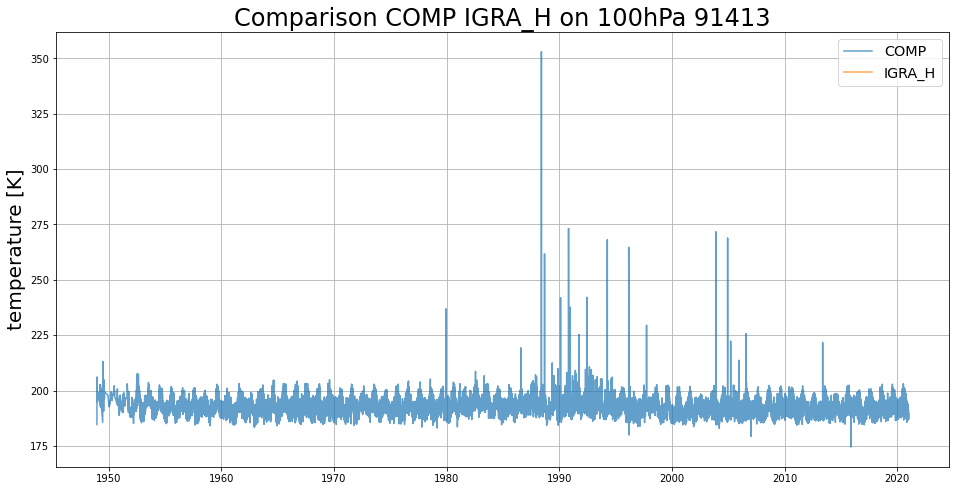

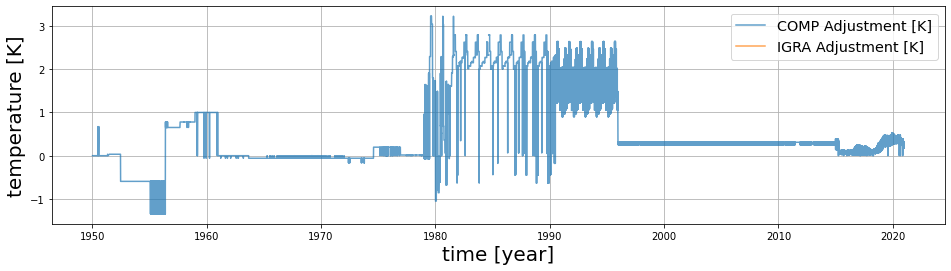

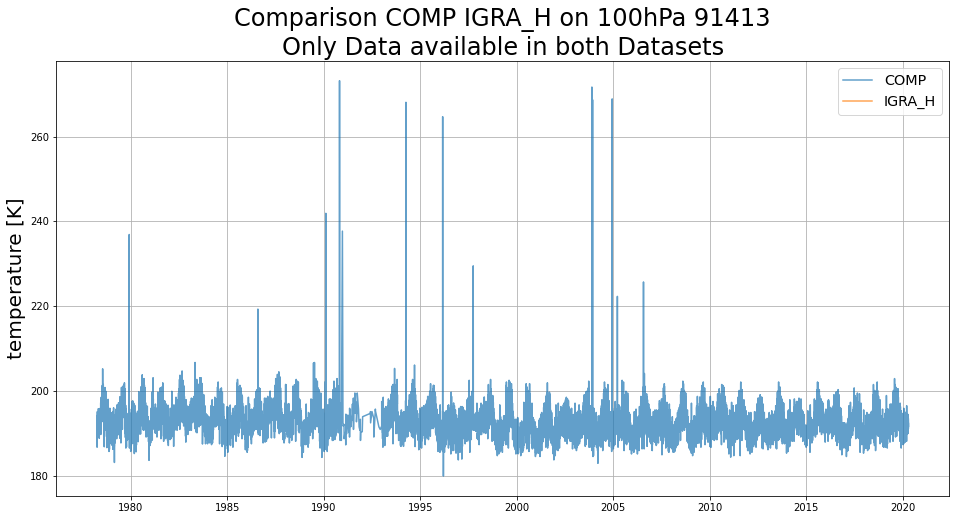

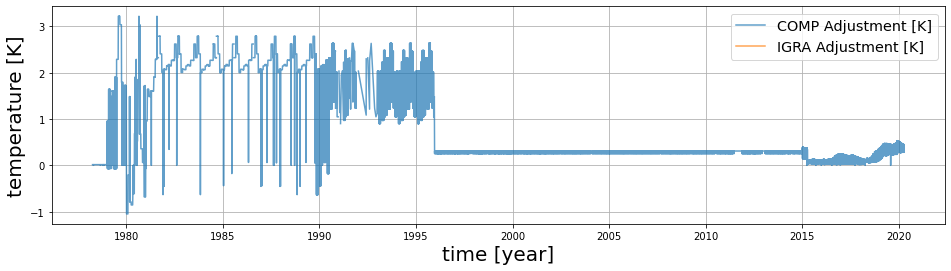

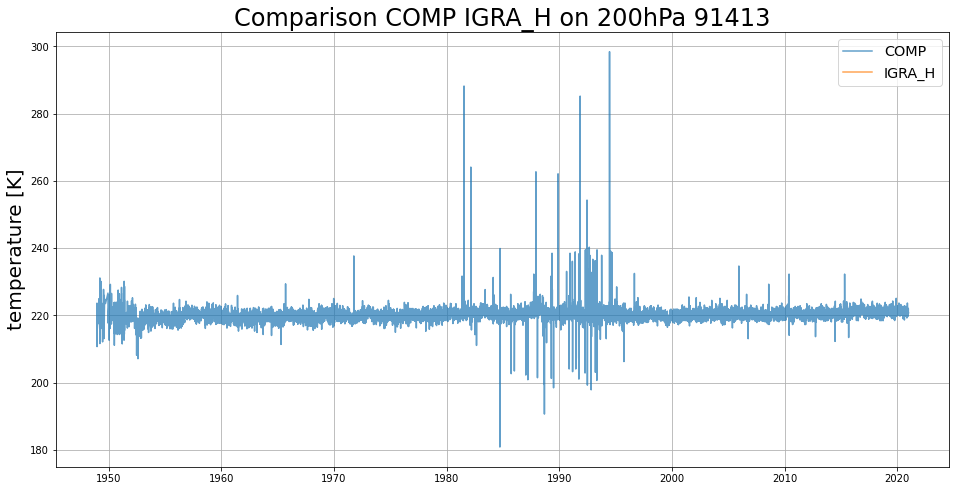

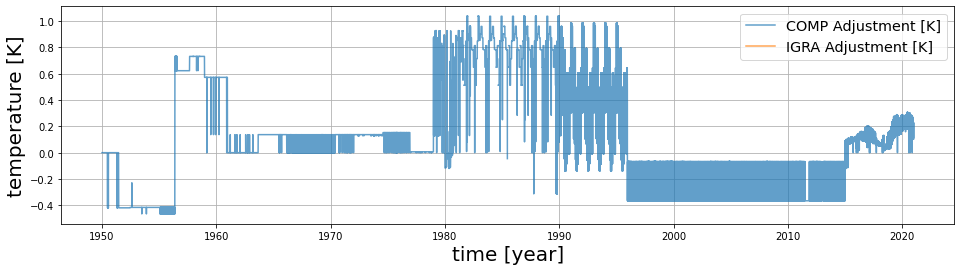

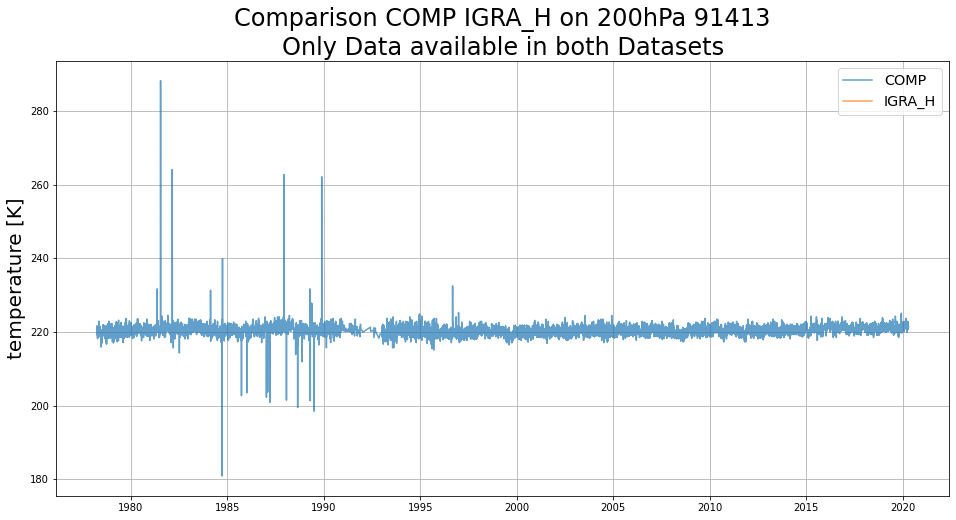

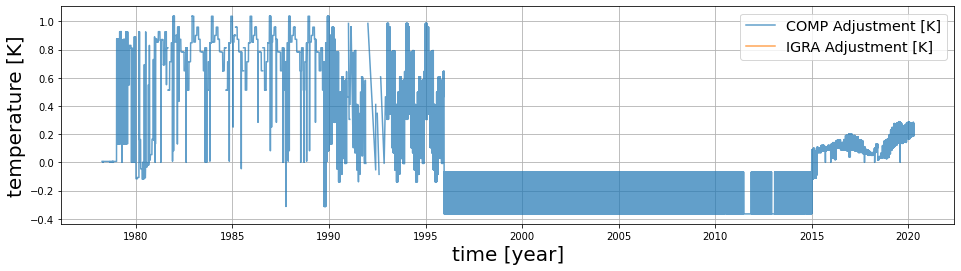

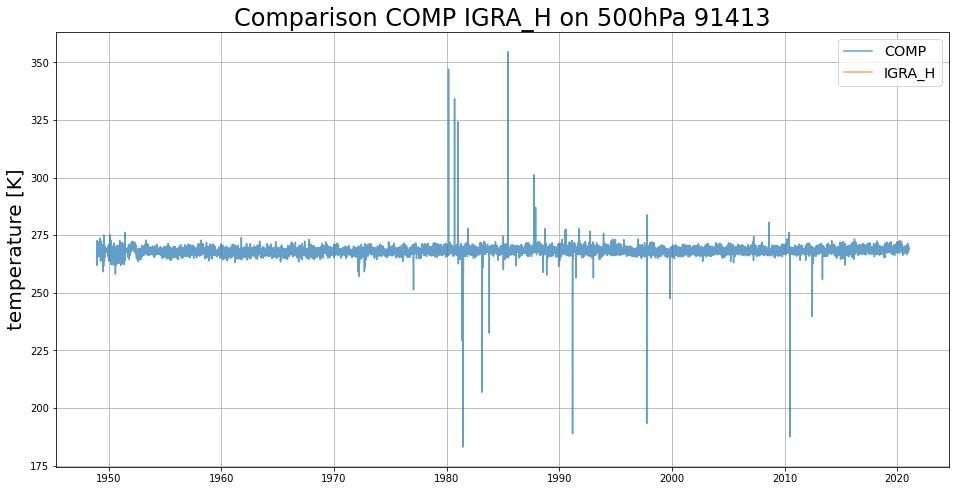

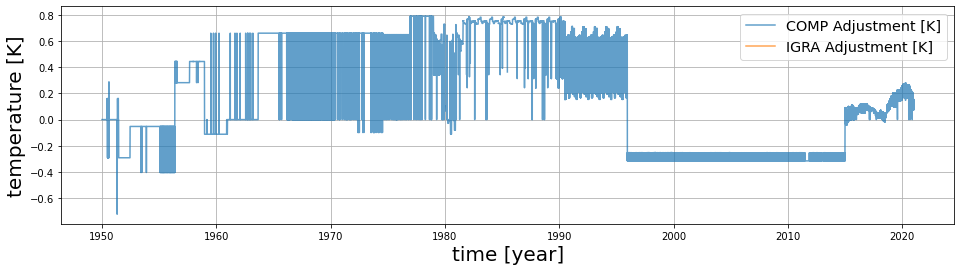

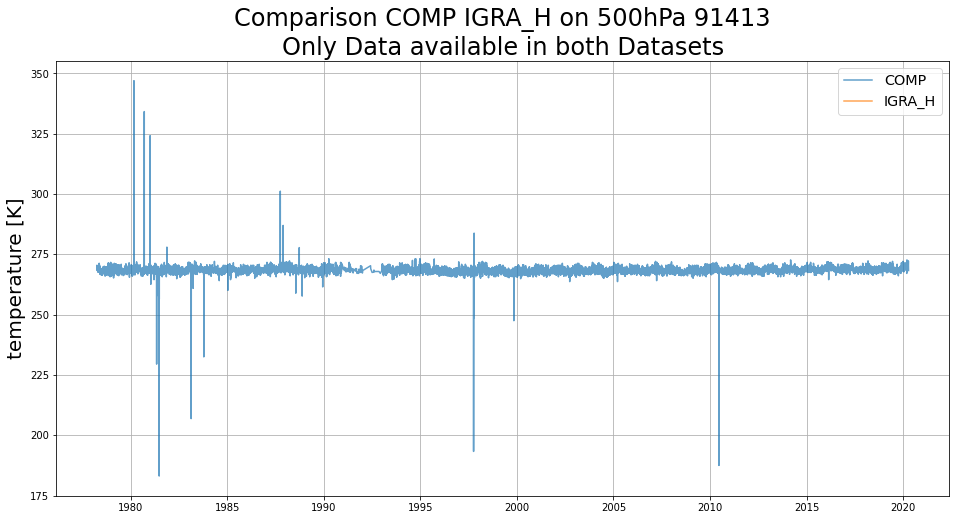

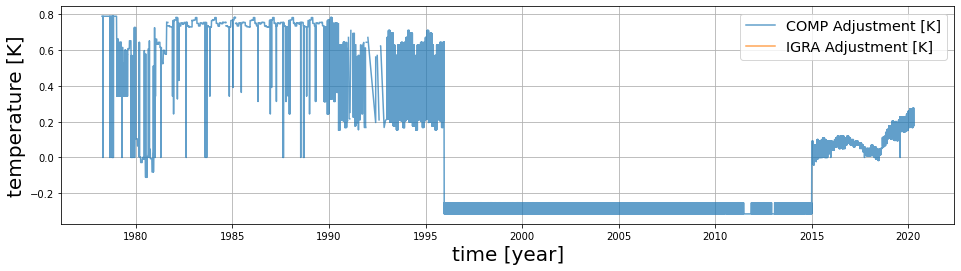

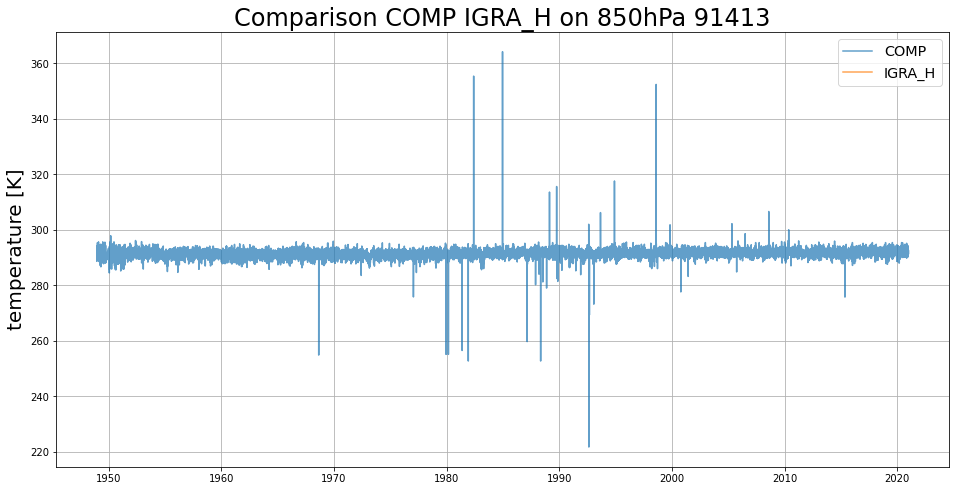

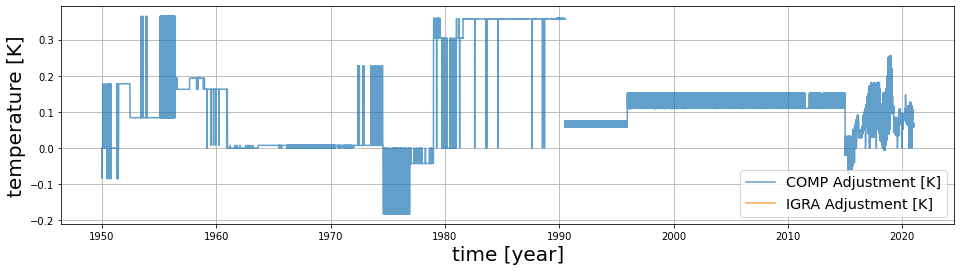

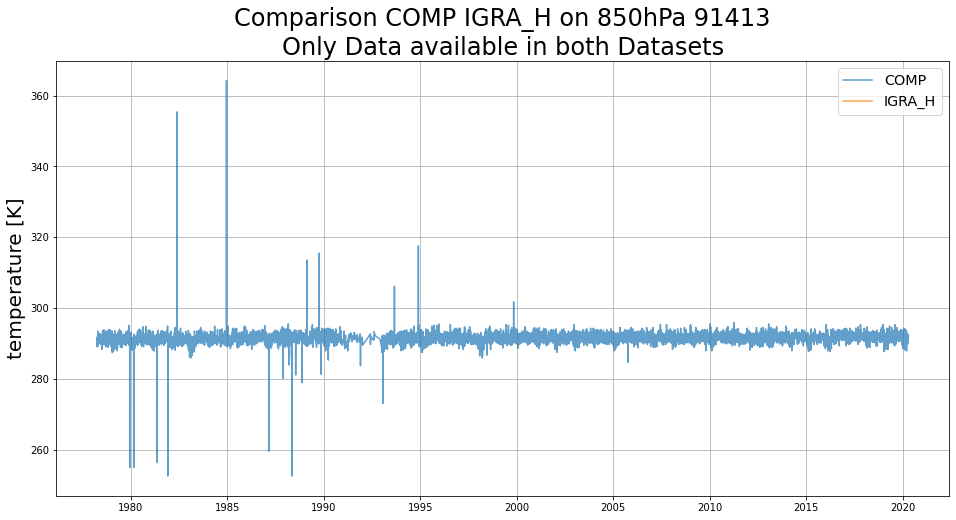

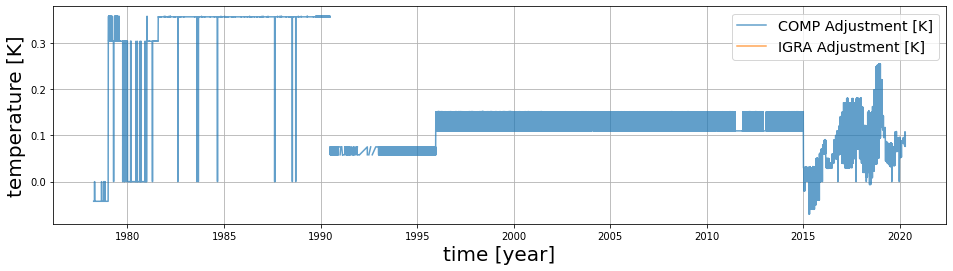

In [17]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_original[i]
    b = igrah_original[i]
    c = comp_original[i]
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(c.time, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(b.report_timestamp, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc)
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ax1.plot(c.time, np.asarray(c.bias_estimate), label = 'COMP Adjustment [K]', alpha=0.7)
    ax1.plot(b.report_timestamp, (np.asarray(a.air_temperature)-np.asarray(b.air_temperature)), label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    
    a = igra_adjusted[i]
    b = igra_h_adjusted[i]
    c = comp_adjusted[i]
    xax = np.asarray(c.time)
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+'\n'+'Only Data available in both Datasets')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.bias_estimate), label = 'COMP Adjustment [K]', alpha=0.7)
    ax1.plot(xax, (np.asarray(a.air_temperature)-np.asarray(b.air_temperature)), label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

## Trends:

Before we adjust the data sets any further, we have a look at the trends. <br>


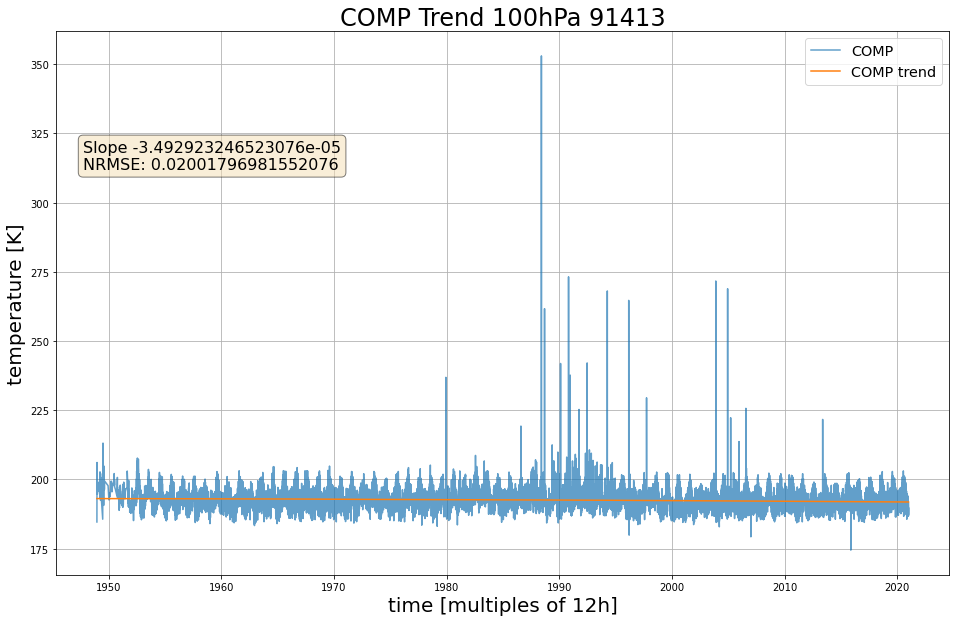

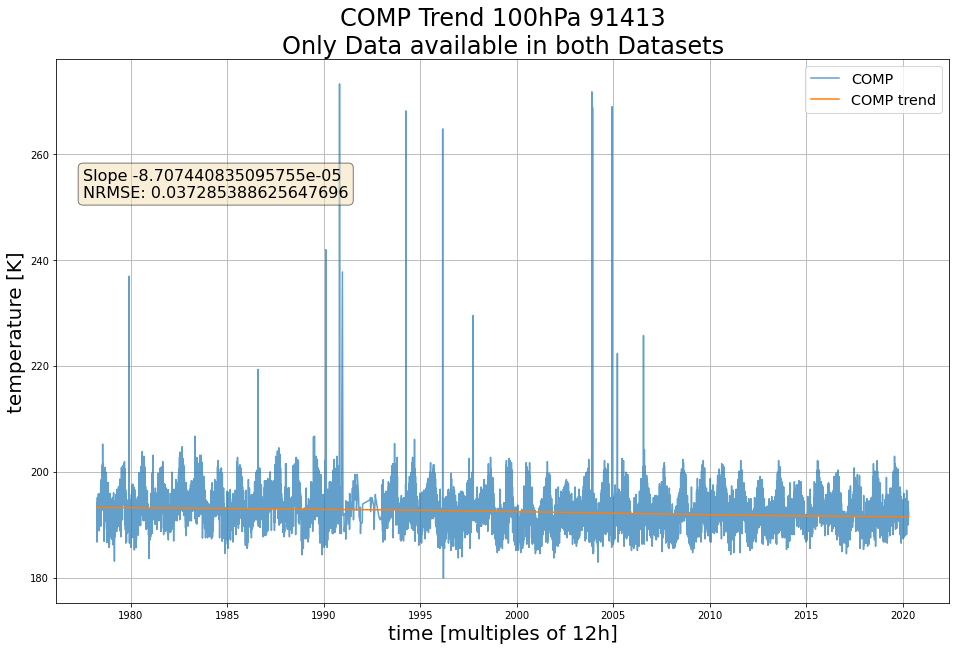

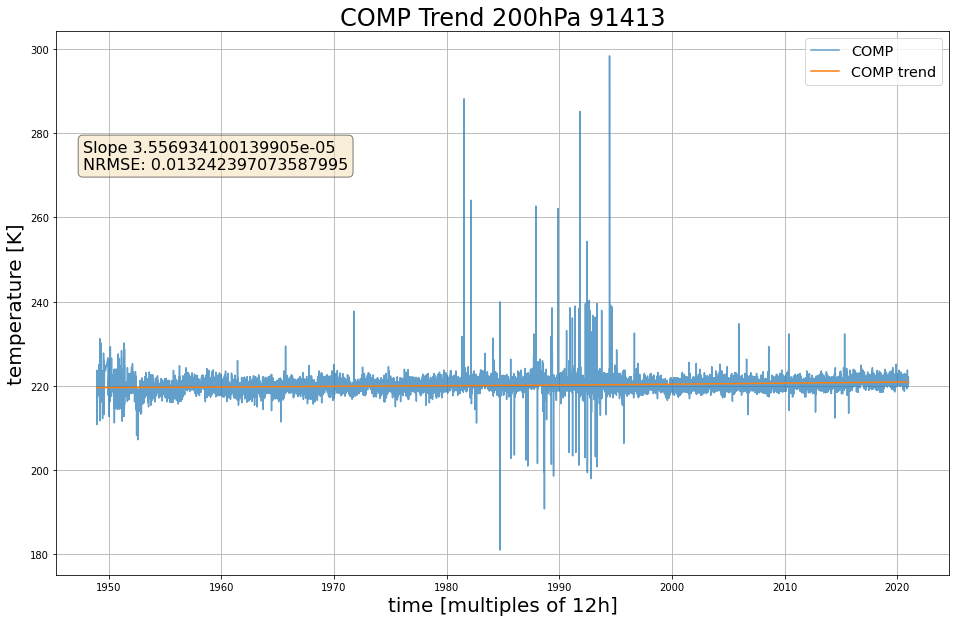

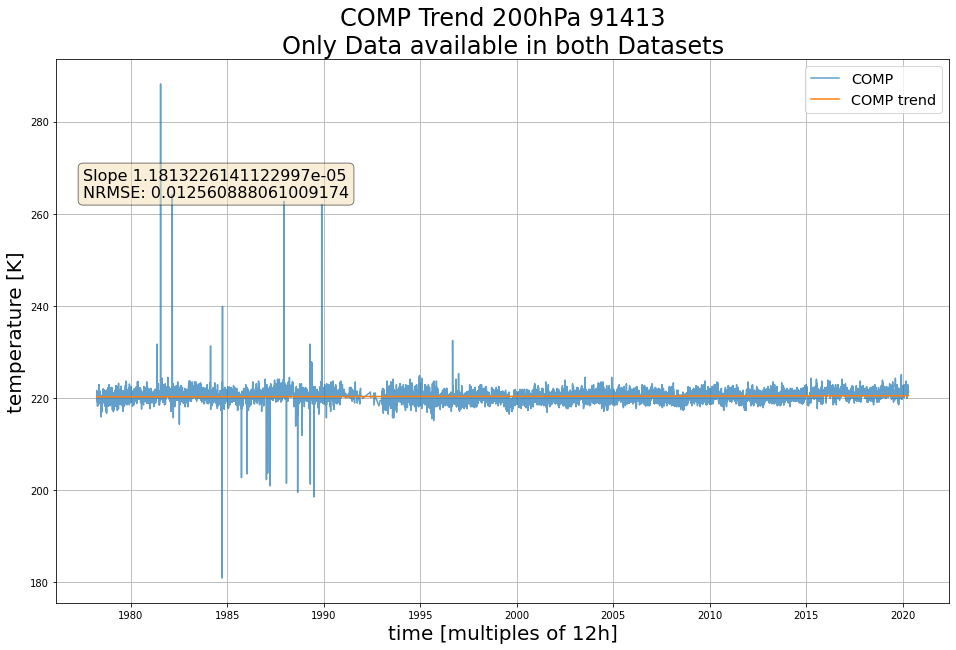

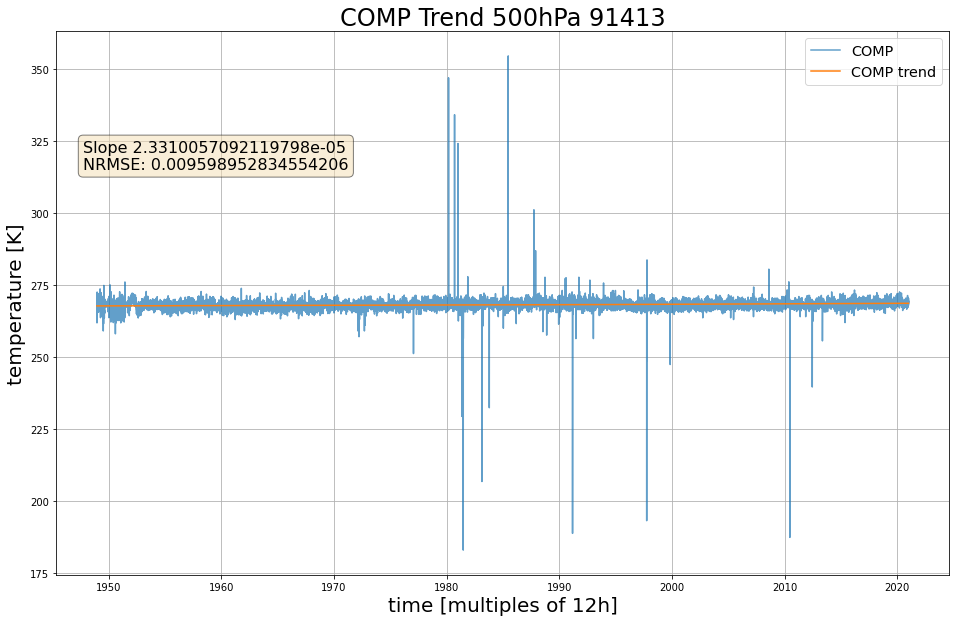

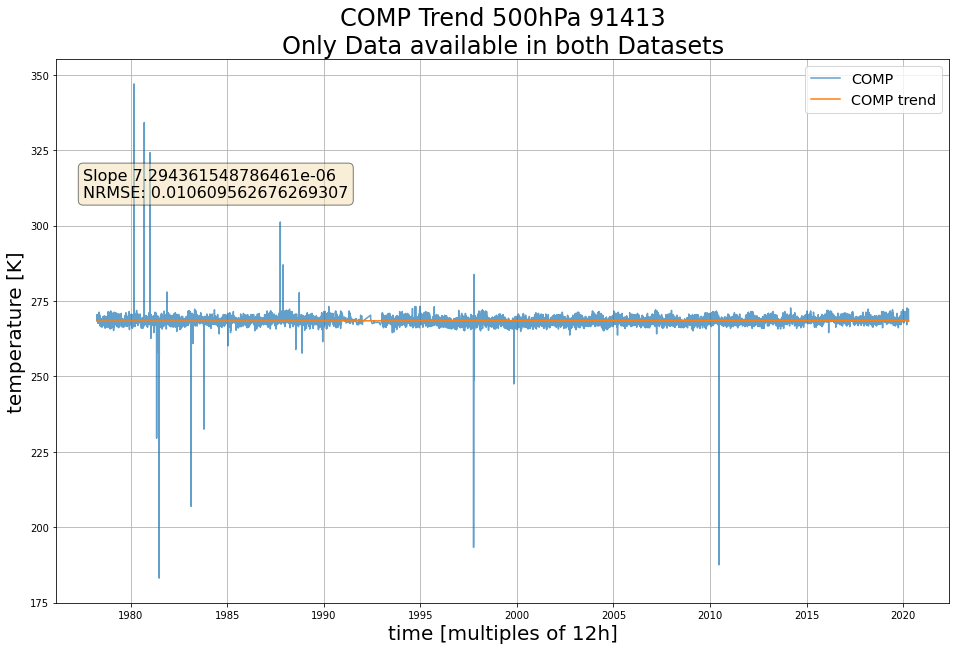

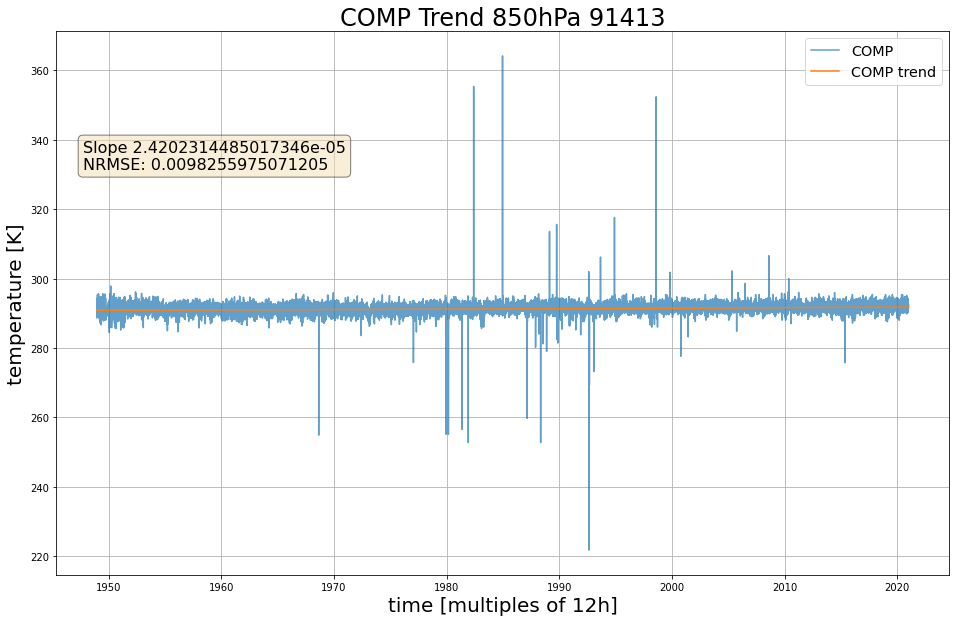

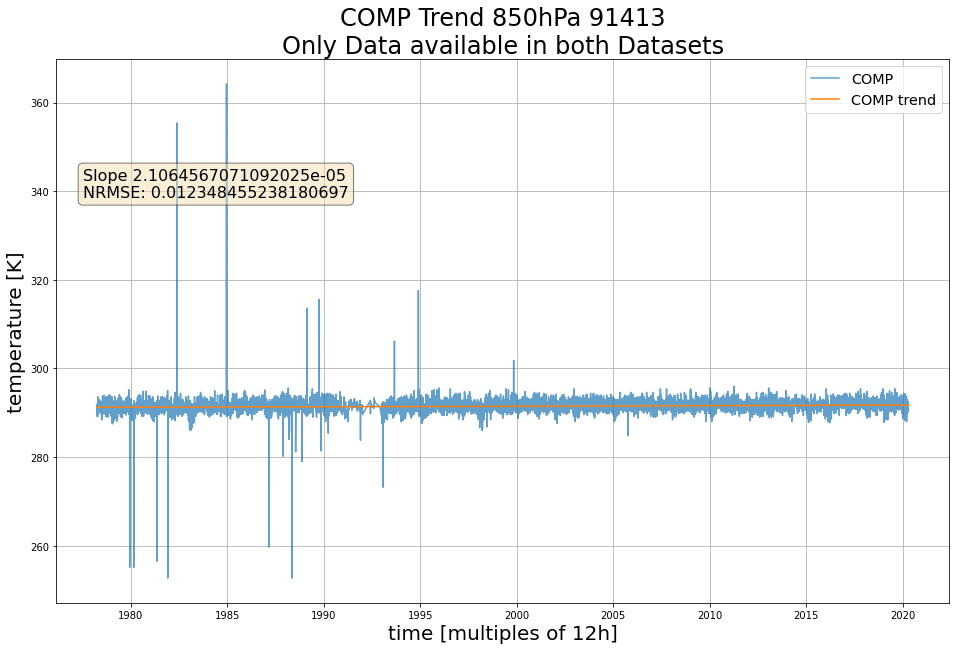

In [18]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    c = comp_original[i]
    xax = np.asarray(c.time)
    selected = c.ta
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'COMP', alpha=0.7)
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'COMP trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='COMP Trend '+str(preslist[i])+'hPa '+loc)
    textstr = 'Slope ' + str(coefficients[0]) +'\n'+'NRMSE: ' + str(nrmse)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.03, 0.8, textstr, transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    c = comp_adjusted[i]
    xax = np.asarray(c.time)
    
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    
    c = comp_adjusted[i]
    xax = np.asarray(c.time)
    selected = c.ta
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'COMP', alpha=0.7)
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'COMP trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='COMP Trend '+str(preslist[i])+'hPa '+loc+'\n'+'Only Data available in both Datasets')
    textstr = 'Slope ' + str(coefficients[0]) +'\n'+'NRMSE: ' + str(nrmse)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.03, 0.8, textstr, transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)


    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    

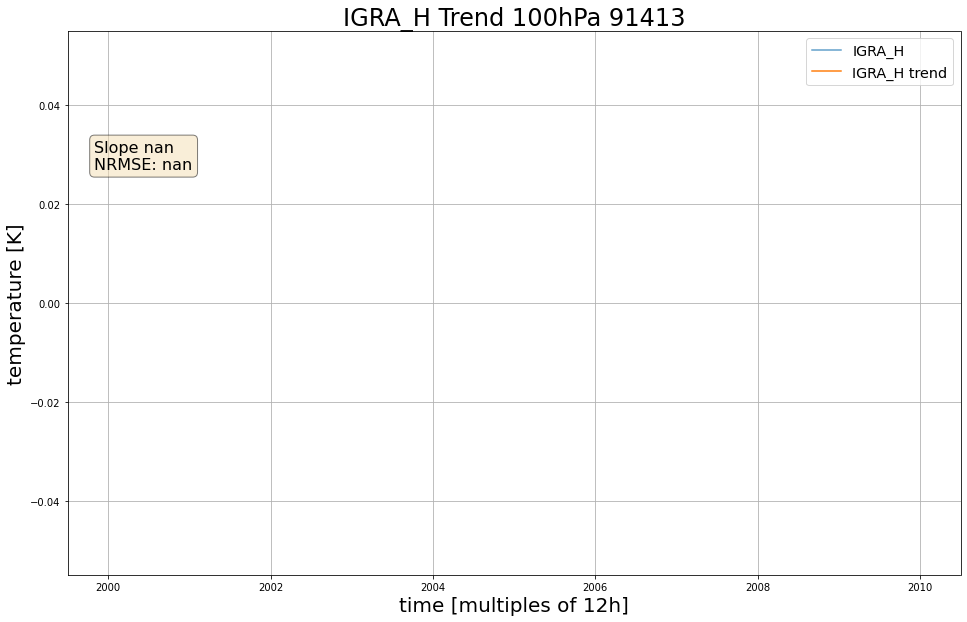

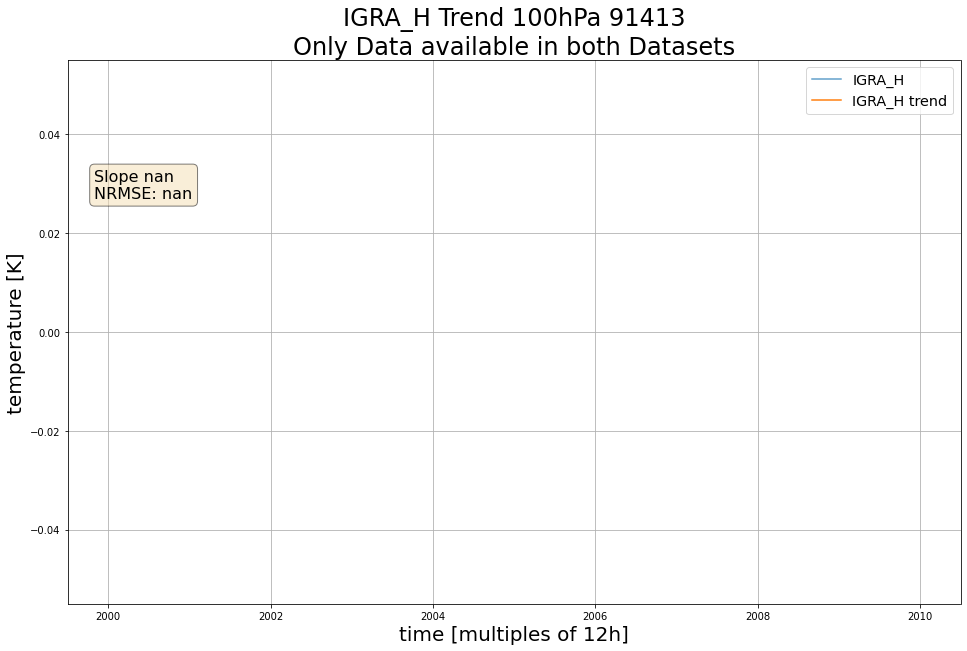

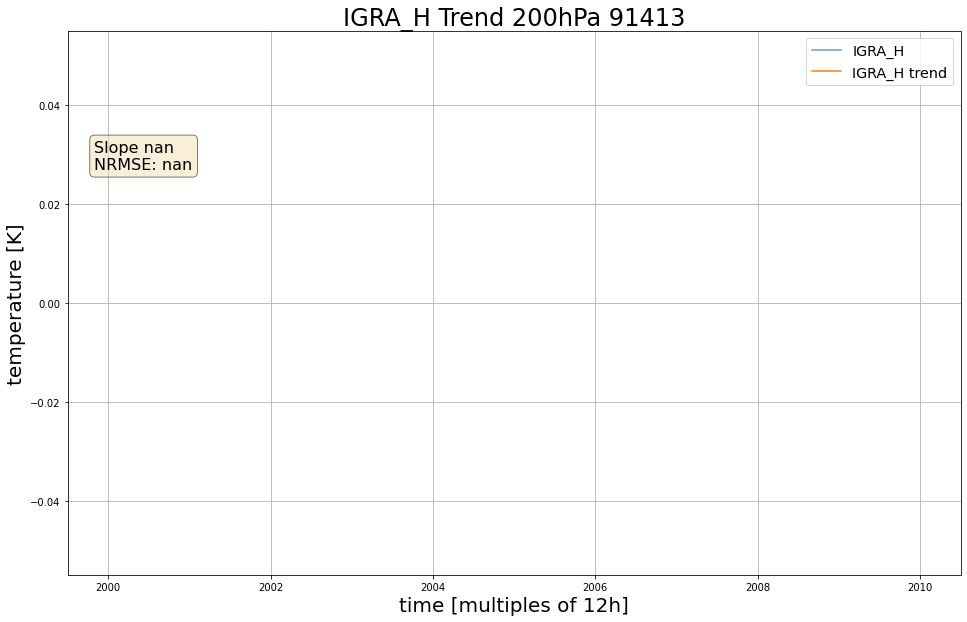

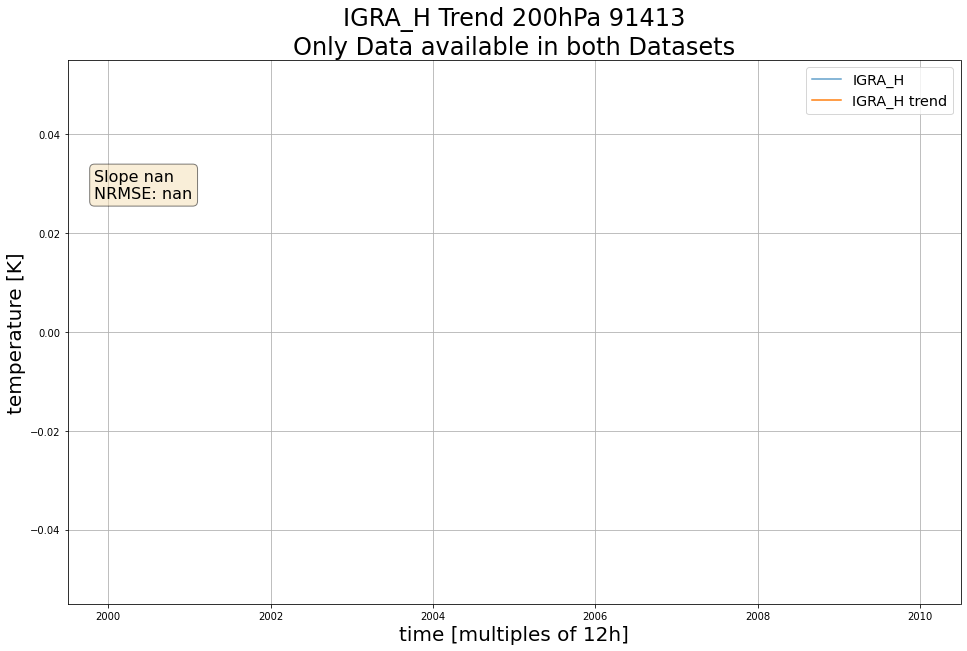

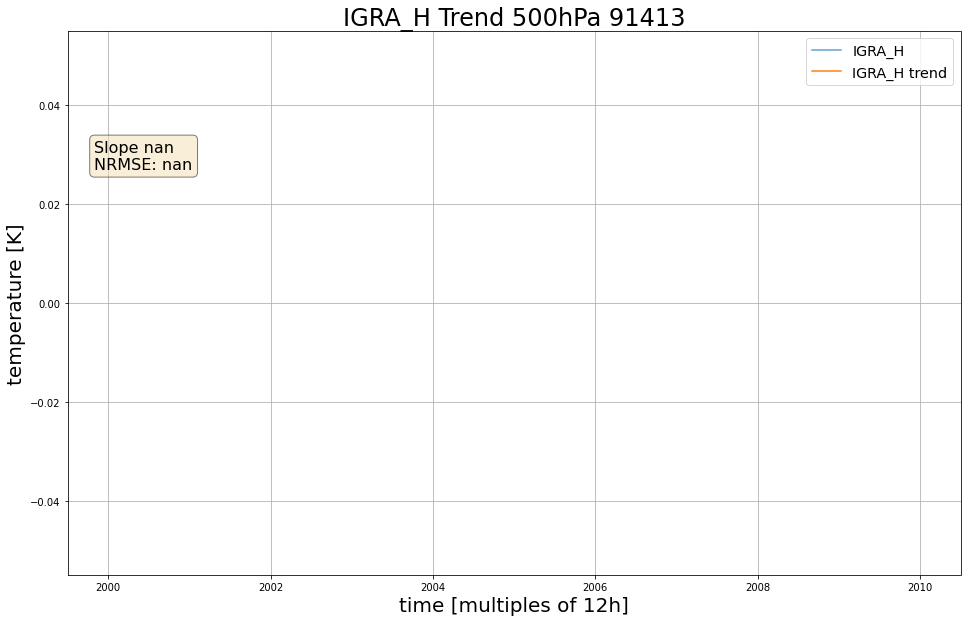

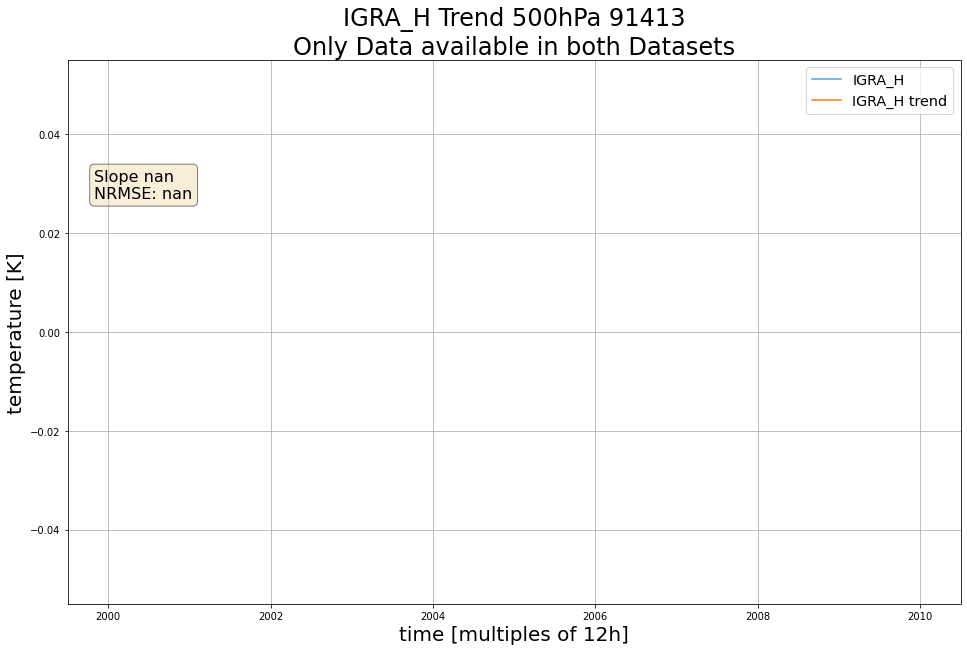

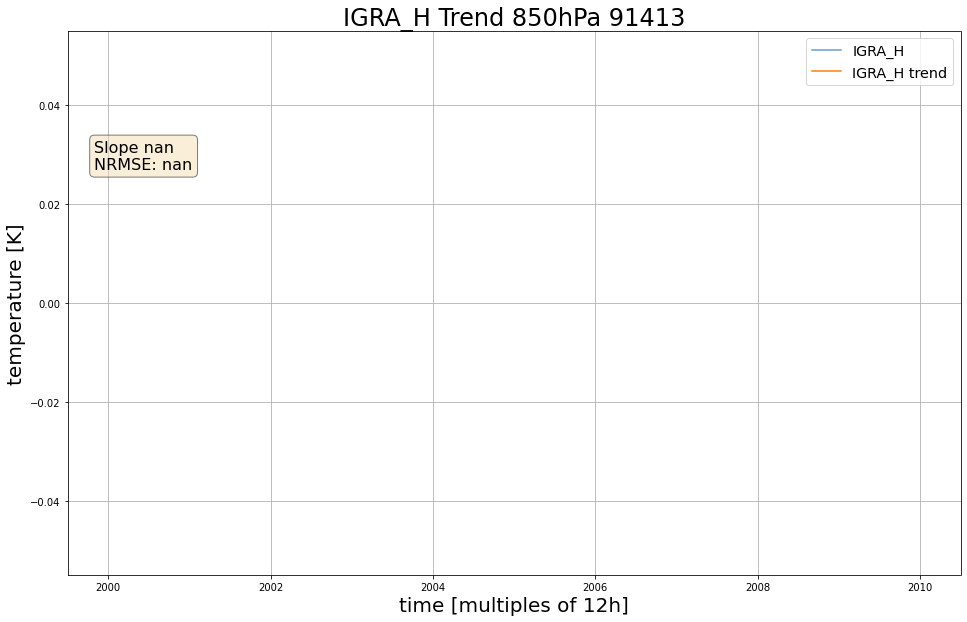

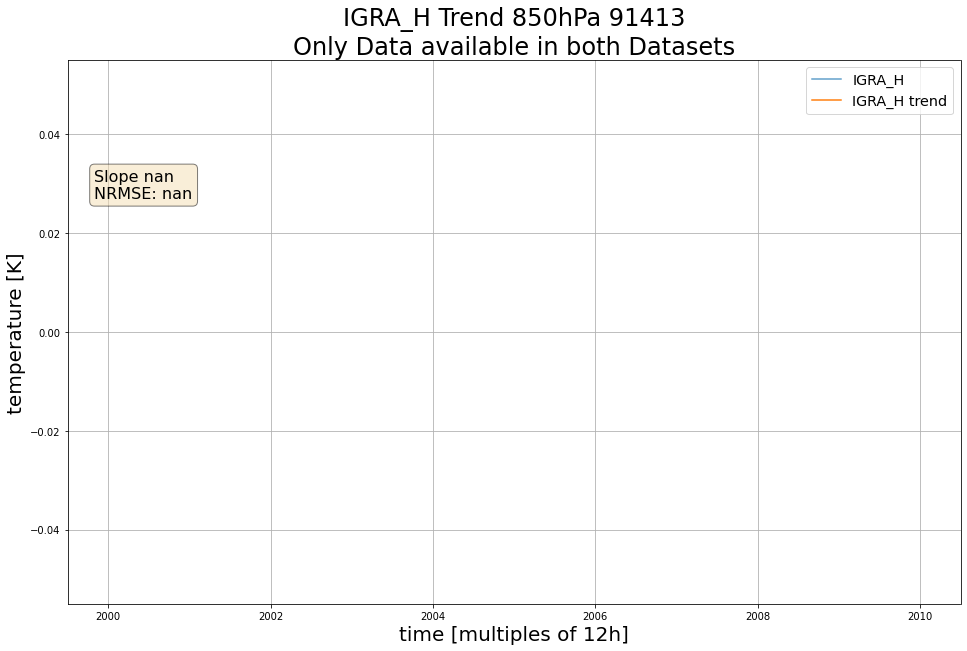

In [19]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    c = igrah_original[i]
    xax = np.asarray(c.report_timestamp)
    selected = c.air_temperature
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'IGRA_H', alpha=0.7)
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'IGRA_H trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='IGRA_H Trend '+str(preslist[i])+'hPa '+loc)
    textstr = 'Slope ' + str(coefficients[0]) +'\n'+'NRMSE: ' + str(nrmse)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.03, 0.8, textstr, transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    c = comp_adjusted[i]
    xax = np.asarray(c.time)
    
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    
    c = igra_h_adjusted[i]
    xax = np.asarray(c.report_timestamp)
    selected = c.air_temperature
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'IGRA_H', alpha=0.7)
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'IGRA_H trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='IGRA_H Trend '+str(preslist[i])+'hPa '+loc+'\n'+'Only Data available in both Datasets')
    textstr = 'Slope ' + str(coefficients[0]) +'\n'+'NRMSE: ' + str(nrmse)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.03, 0.8, textstr, transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)


    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    

## Moving Average

We remove the monthly variation, by creating a moving average over 14 days and subtracting it from the original data. <br>
Every data set is treated the same way, so they stay comparable.

In [20]:
# reduced data
#
comp_ma = []
igra_h_ma = []
igra_ma = []

for i in range(len(comp_adjusted)):
    N = 14
    S = 7
    E = 6
    
    datain = np.asarray(comp_adjusted[i].ta)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    comp_ma.append(comp_adjusted[i])
    comp_ma[i].ta = comp_ma[i].ta - rm
    
    datain = np.asarray(igra_adjusted[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igra_ma.append(igra_adjusted[i])
    igra_ma[i].air_temperature = igra_ma[i].air_temperature - rm
    
    datain = np.asarray(igra_h_adjusted[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igra_h_ma.append(igra_h_adjusted[i])
    igra_h_ma[i].air_temperature = igra_h_ma[i].air_temperature - rm

In [21]:
# original data
#
comp_o_ma = []
igrah_o_ma = []
igra_o_ma = []

for i in range(len(comp_original)):
    N = 14
    S = 7
    E = 6
    
    datain = np.asarray(comp_original[i].ta)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    comp_o_ma.append(comp_original[i])
    comp_o_ma[i].ta = comp_o_ma[i].ta - rm

    
for i in range(len(igra_original)):
    N = 14
    S = 7
    E = 6
    
    datain = np.asarray(igra_original[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igra_o_ma.append(igra_original[i])
    igra_o_ma[i].air_temperature = igra_o_ma[i].air_temperature - rm
    
    datain = np.asarray(igrah_original[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igrah_o_ma.append(igrah_original[i])
    igrah_o_ma[i].air_temperature = igrah_o_ma[i].air_temperature - rm

## Day and Night Data:

We split the data sets into a day ascent and night ascent part. <br>

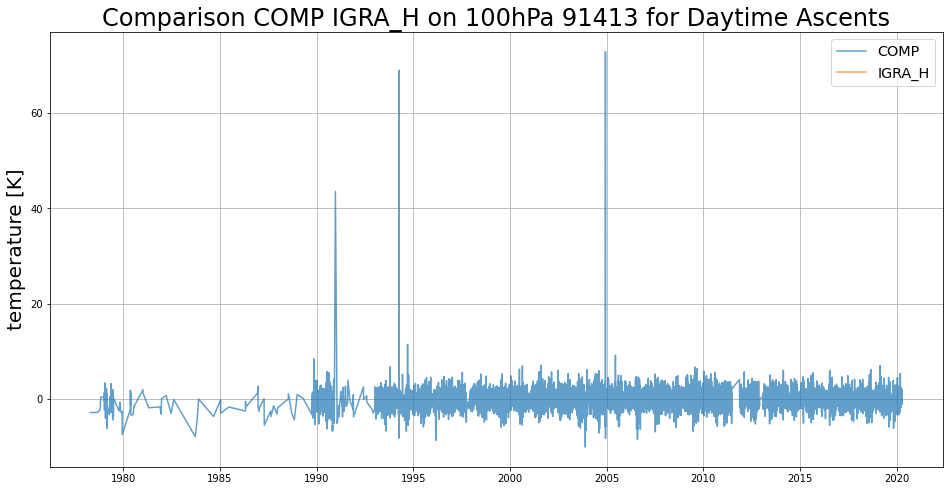

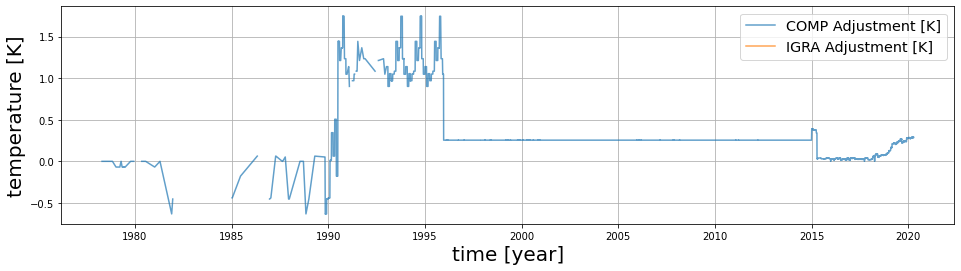

COMP Adjustment MEAN: 0.33001307
COMP Adjustment MIN: -0.632511
COMP Adjustment MAX: 1.7450587
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


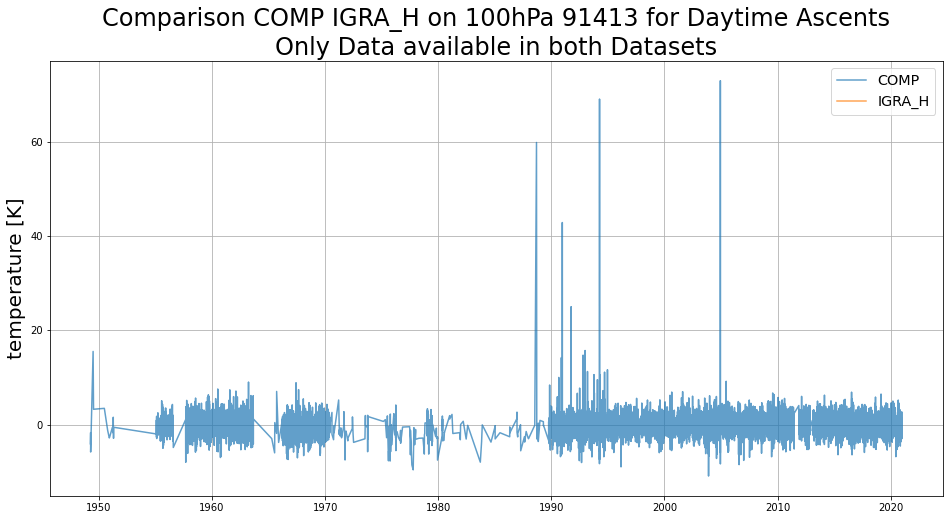

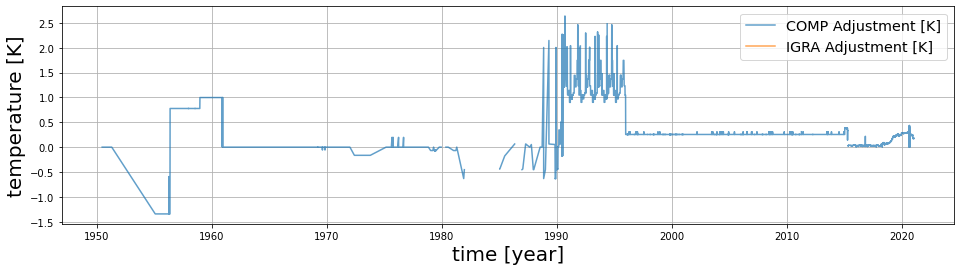

COMP Adjustment MEAN: 0.313963
COMP Adjustment MIN: -1.3435695
COMP Adjustment MAX: 2.6327326
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


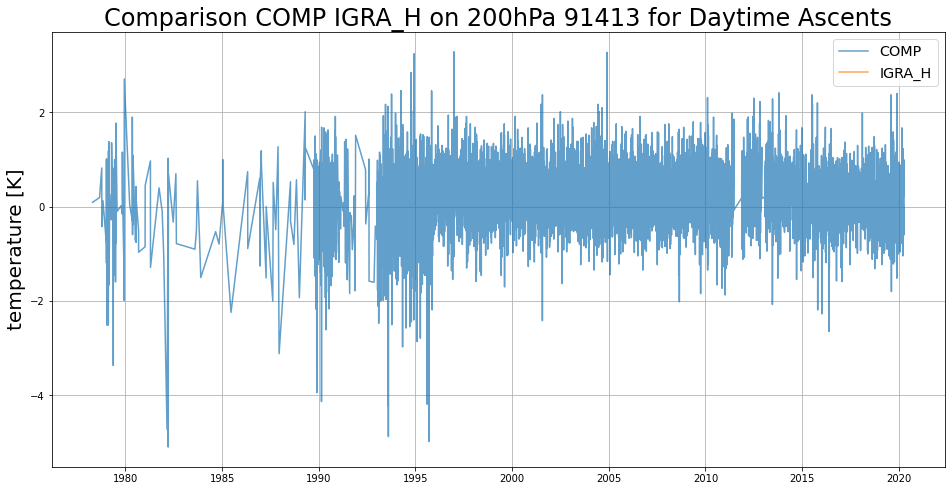

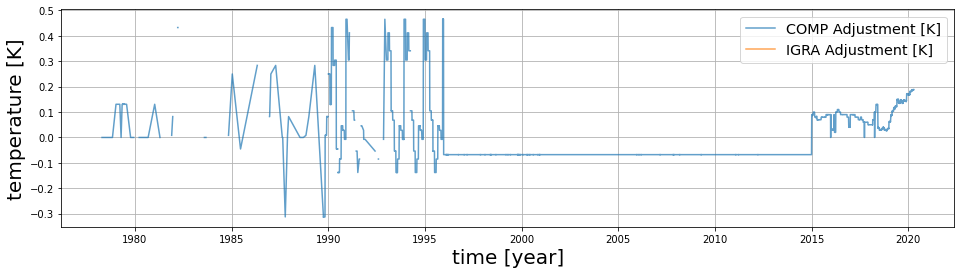

COMP Adjustment MEAN: -0.018048728
COMP Adjustment MIN: -0.31289652
COMP Adjustment MAX: 0.46548402
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


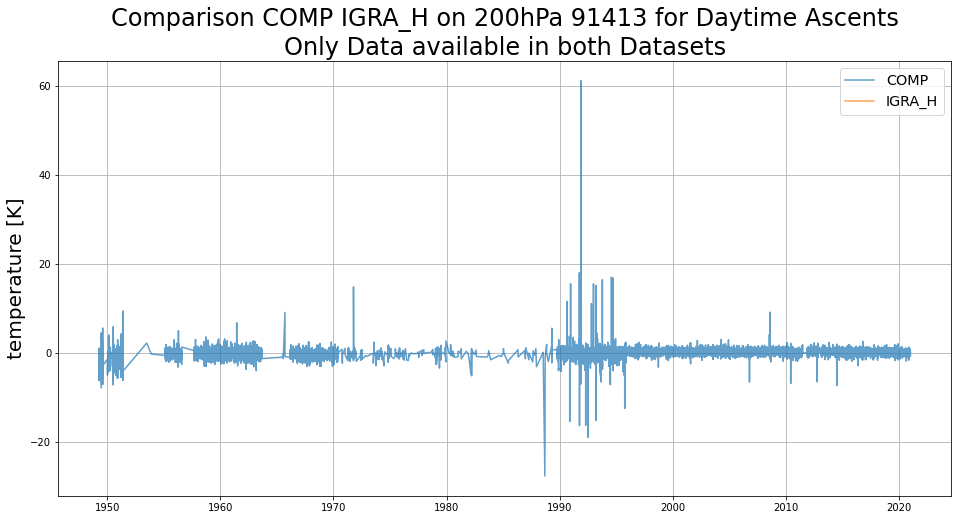

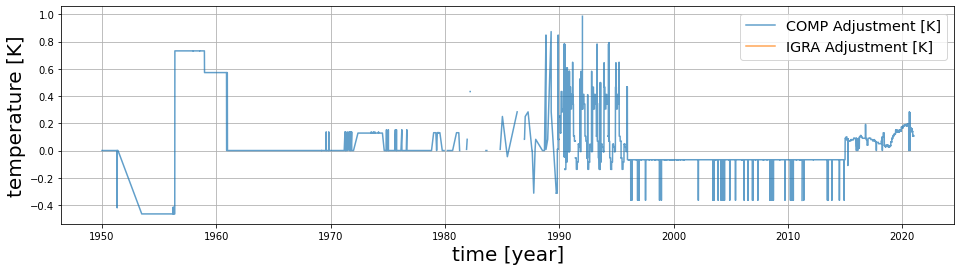

COMP Adjustment MEAN: 0.03881245
COMP Adjustment MIN: -0.4652487
COMP Adjustment MAX: 0.98554343
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


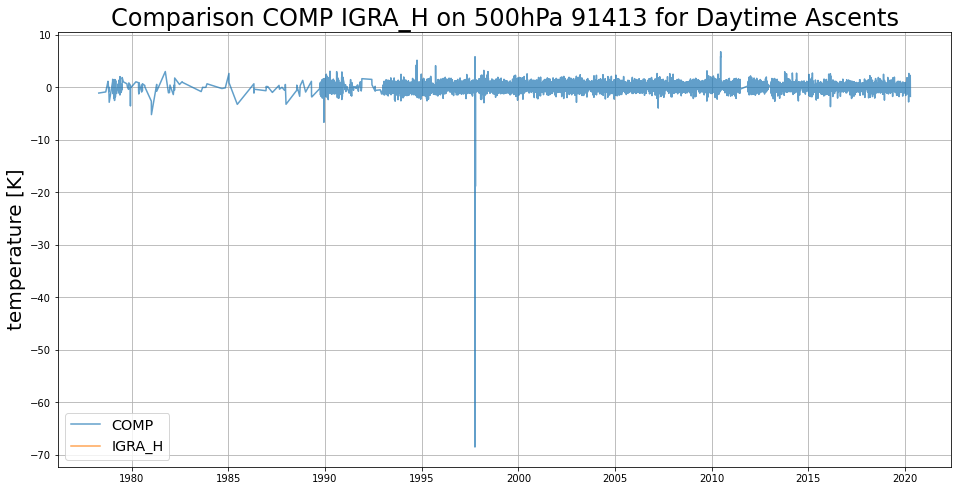

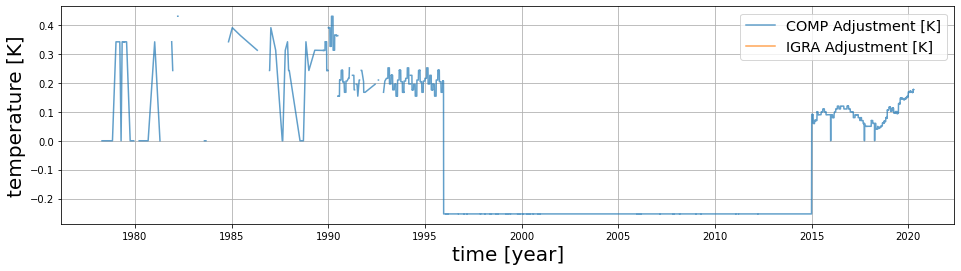

COMP Adjustment MEAN: -0.12411637
COMP Adjustment MIN: -0.25318605
COMP Adjustment MAX: 0.430813
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


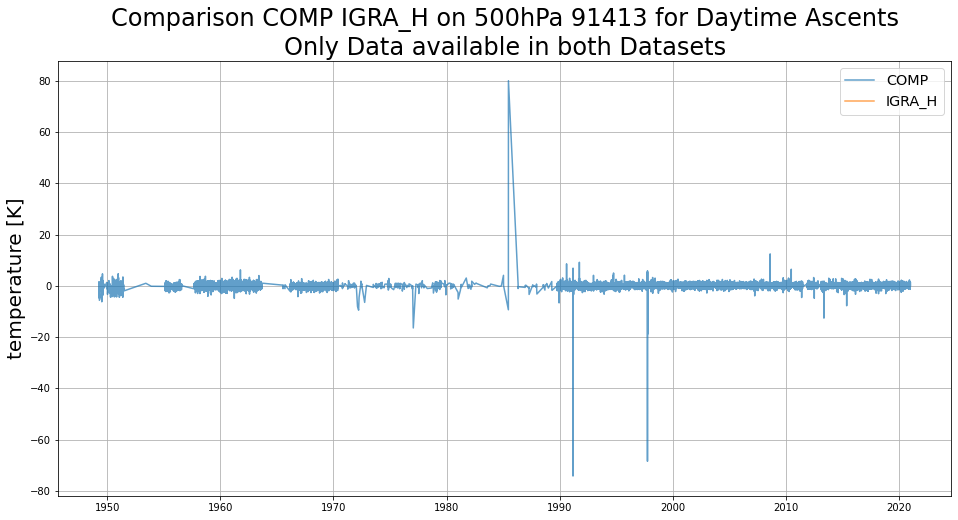

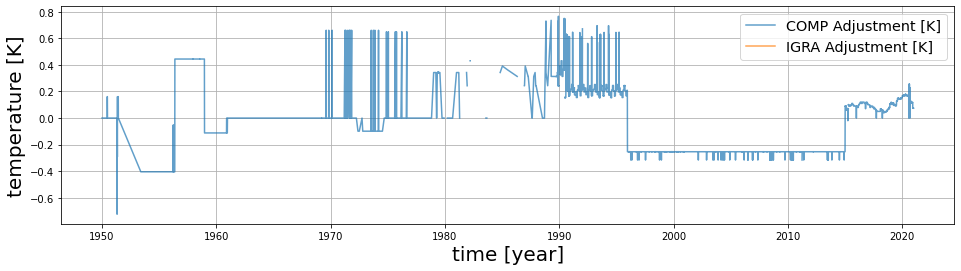

COMP Adjustment MEAN: -0.058327265
COMP Adjustment MIN: -0.7207726
COMP Adjustment MAX: 0.7656119
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


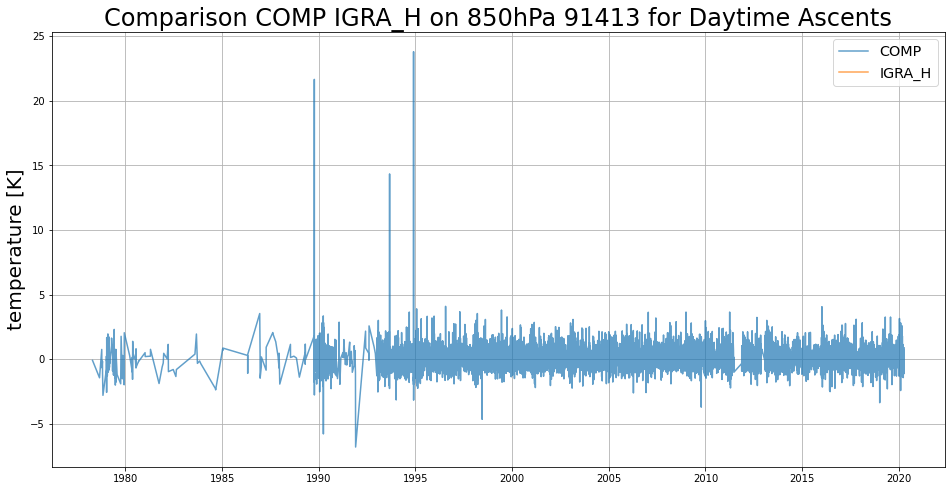

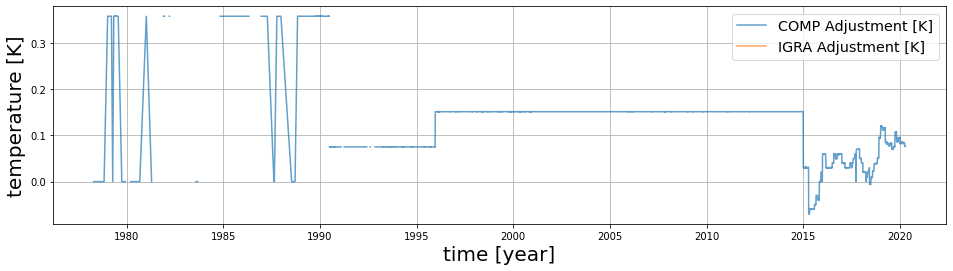

COMP Adjustment MEAN: 0.13699566
COMP Adjustment MIN: -0.06999994
COMP Adjustment MAX: 0.35835123
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


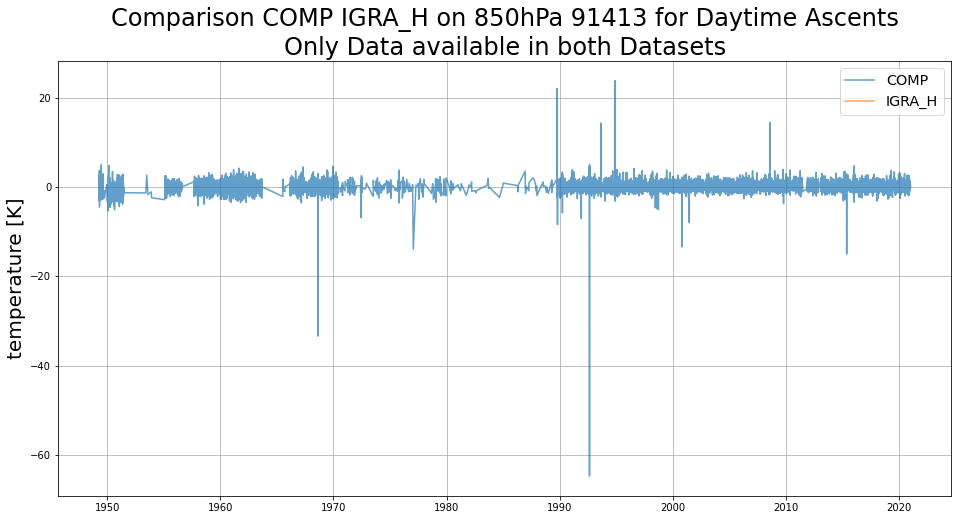

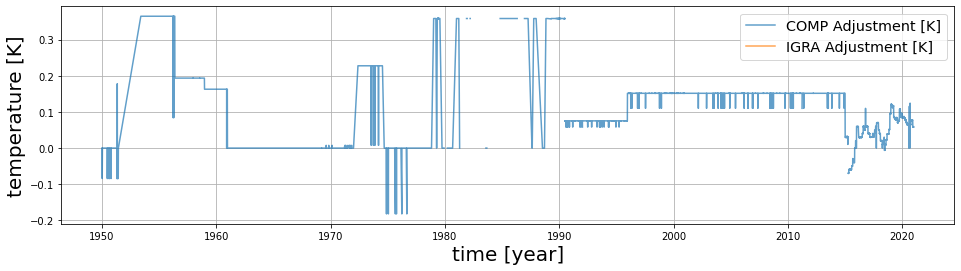

COMP Adjustment MEAN: 0.11135164
COMP Adjustment MIN: -0.1821254
COMP Adjustment MAX: 0.36462614
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


In [22]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour >= 6][a.report_timestamp.dt.hour < 18]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour >= 6][b.report_timestamp.dt.hour < 18]
    c = comp_ma[i]
    c = c[c.time.dt.hour >= 6][c.time.dt.hour < 18]
    xax = np.asarray(c.time)    
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+' for Daytime Ascents')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(xax, ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(xax, ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
#     textstr = ('COMP Adjustment MEAN: ' + str(ca.mean()) + '\n' +'COMP Adjustment MIN: ' + str(ca.min()) + '\n' +'COMP Adjustment MAX: ' + str(ca.max()) + '\n' +'IGRA Adjustment MEAN: ' + str(ia.mean())+ '\n' +'IGRA Adjustment MIN: ' + str(ia.min())  + '\n' +'IGRA Adjustment MAX: ' + str(ia.max()))
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(np.nanmean(ca)))
    print('COMP Adjustment MIN: ' + str(np.nanmin(ca)))
    print('COMP Adjustment MAX: ' + str(np.nanmax(ca)))
    print('IGRA Adjustment MEAN: ' + str(np.nanmean(ia)))
    print('IGRA Adjustment MIN: ' + str(np.nanmin(ia)))
    print('IGRA Adjustment MAX: ' + str(np.nanmax(ia)))
    
    
    a = igra_o_ma[i]
    a = a[a.report_timestamp.dt.hour >= 6]
    a = a[a.report_timestamp.dt.hour < 18]
    b = igrah_o_ma[i]
    b = b[b.report_timestamp.dt.hour >= 6]
    b = b[b.report_timestamp.dt.hour < 18]
    c = comp_o_ma[i]
    c = c[c.time.dt.hour >= 6]
    c = c[c.time.dt.hour < 18]
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(np.asarray(c.time), np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(np.asarray(b.report_timestamp), np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+' for Daytime Ascents'+'\n'+'Only Data available in both Datasets')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(np.asarray(c.time), ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(np.asarray(a.report_timestamp), ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
#     textstr = ('COMP Adjustment MEAN: ' + str(ca.mean()) + '\n' +'COMP Adjustment MIN: ' + str(ca.min()) + '\n' +'COMP Adjustment MAX: ' + str(ca.max()) + '\n' +'IGRA Adjustment MEAN: ' + str(ia.mean())+ '\n' +'IGRA Adjustment MIN: ' + str(ia.min())  + '\n' +'IGRA Adjustment MAX: ' + str(ia.max()))
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(np.nanmean(ca)))
    print('COMP Adjustment MIN: ' + str(np.nanmin(ca)))
    print('COMP Adjustment MAX: ' + str(np.nanmax(ca)))
    print('IGRA Adjustment MEAN: ' + str(np.nanmean(ia)))
    print('IGRA Adjustment MIN: ' + str(np.nanmin(ia)))
    print('IGRA Adjustment MAX: ' + str(np.nanmax(ia)))

In [23]:
a = igra_o_ma[0]
a[a.report_timestamp.dt.hour < 6].append(a[a.report_timestamp.dt.hour > 18])

station_name    report_timestamp  report_id   longitude  latitude  \
14       FMM00091413 1978-04-01 00:00:00   30250116  138.066696    9.4833   
46       FMM00091413 1978-04-02 00:00:00   30250129  138.066696    9.4833   
80       FMM00091413 1978-04-03 00:00:00   30250141  138.066696    9.4833   
121      FMM00091413 1978-04-04 00:00:00   30250156  138.066696    9.4833   
169      FMM00091413 1978-04-05 00:00:00   30250176  138.066696    9.4833   
...              ...                 ...        ...         ...       ...   
1488647  FMM00091413 2003-03-18 23:00:00   30284831  138.066696    9.4833   
1843510  FMM00091413 2005-12-09 23:00:00   30285976  138.066696    9.4833   
2292880  FMM00091413 2009-03-03 23:00:00   30277131  138.066696    9.4833   
2475257  FMM00091413 2010-06-22 23:00:00   30249648  138.066696    9.4833   
3131207  FMM00091413 2015-07-22 23:00:00   30263277  138.066696    9.4833   

         air_pressure  air_temperature             actual_time  \
14            10000.0        -1.364281  1978-04-01 00:00:00+00   
46            10000.0        -0.664284  1978-04-02 00:00:00+00   
80            10000.0        -0.164284  1978-04-03 00:00:00+00   
121           10000.0         1.535713  1978-04-04 00:00:00+00   
169           10000.0        -0.164284  1978-04-05 00:00:00+00   
...               ...              ...                     ...   
1488647       10000.0        -3.300001  2003-03-18 22:59:00+00   
1843510       10000.0        -2.235720  2005-12-09 22:59:00+00   
2292880       10000.0        -2.614288  2009-03-03 22:59:00+00   
2475257       10000.0        -4.192860  2010-06-22 22:58:00+00   
3131207       10000.0        -0.028576  2015-07-22 22:58:00+00   

         height_of_station_above_sea_level  
14                                    15.0  
46                                    15.0  
80                                    15.0  
121                                   15.0  
169                                   15.0  
...                                    ...  
1488647                               15.0  
1843510                               15.0  
2292880                               15.0  
2475257                               15.0  
3131207                               15.0  

[14245 rows x 9 columns]

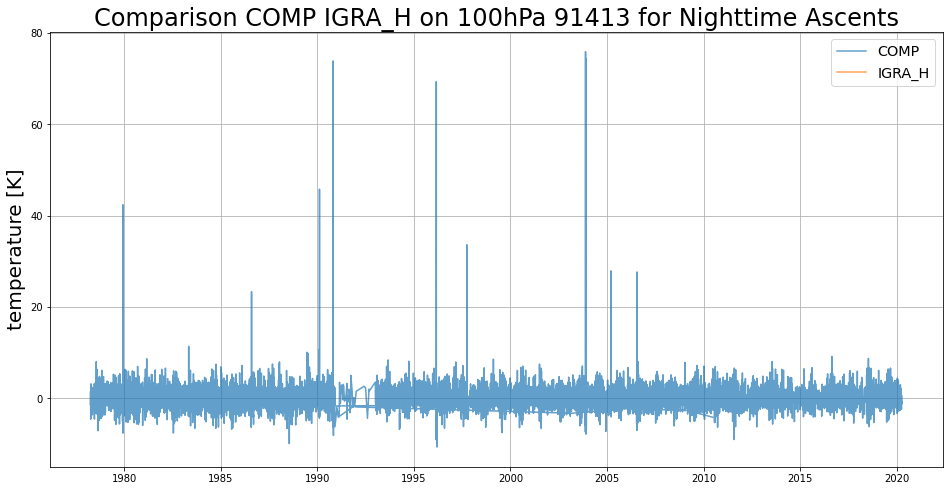

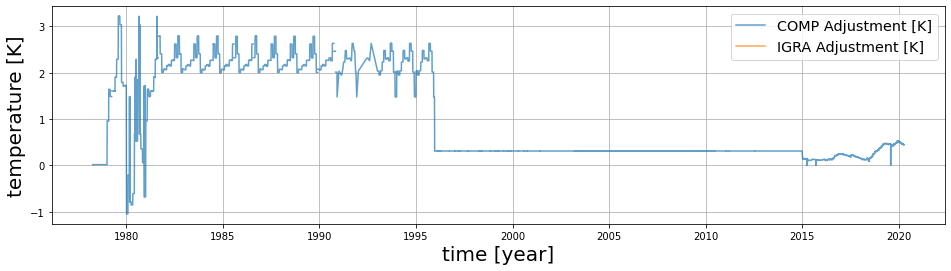

COMP Adjustment MEAN: 1.0033298
COMP Adjustment MIN: -1.0478126
COMP Adjustment MAX: 3.2179632
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


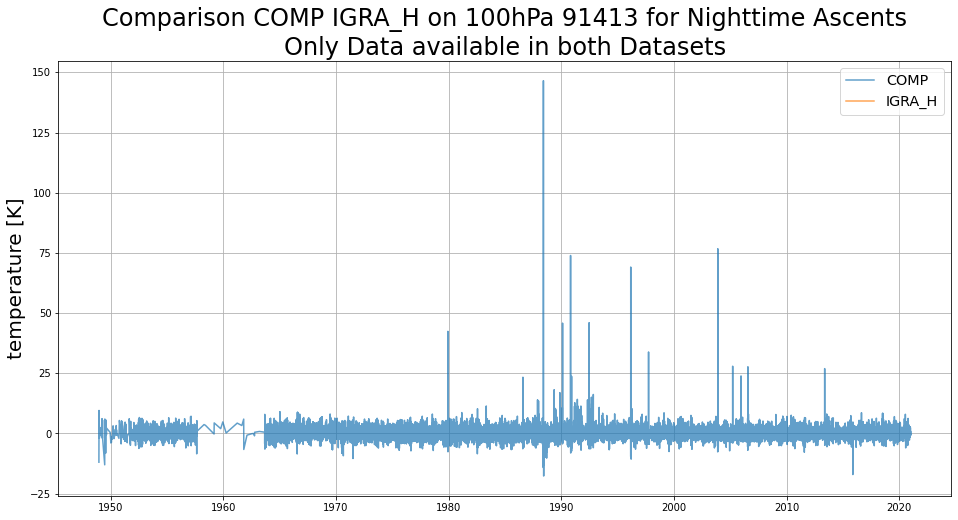

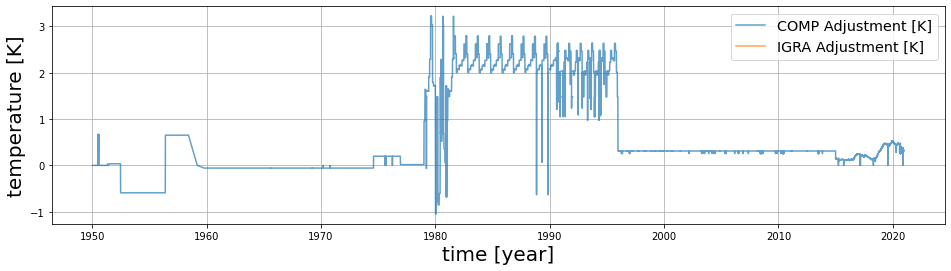

COMP Adjustment MEAN: 0.66089976
COMP Adjustment MIN: -1.0478126
COMP Adjustment MAX: 3.2179632
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


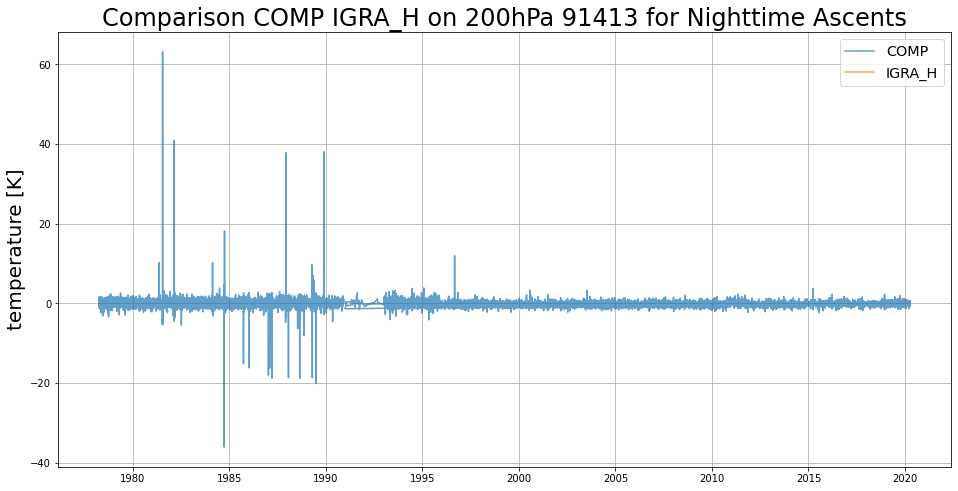

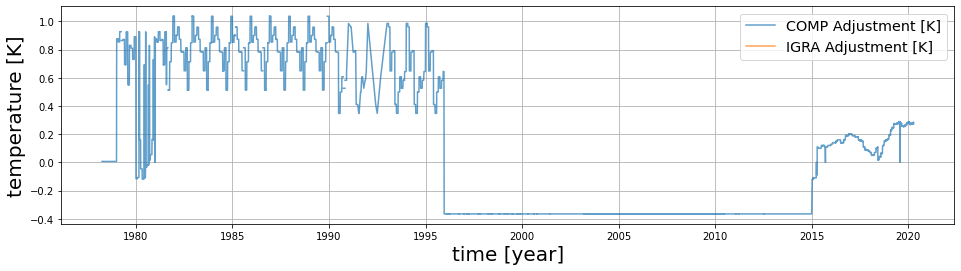

COMP Adjustment MEAN: 0.09965758
COMP Adjustment MIN: -0.3656341
COMP Adjustment MAX: 1.0363239
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


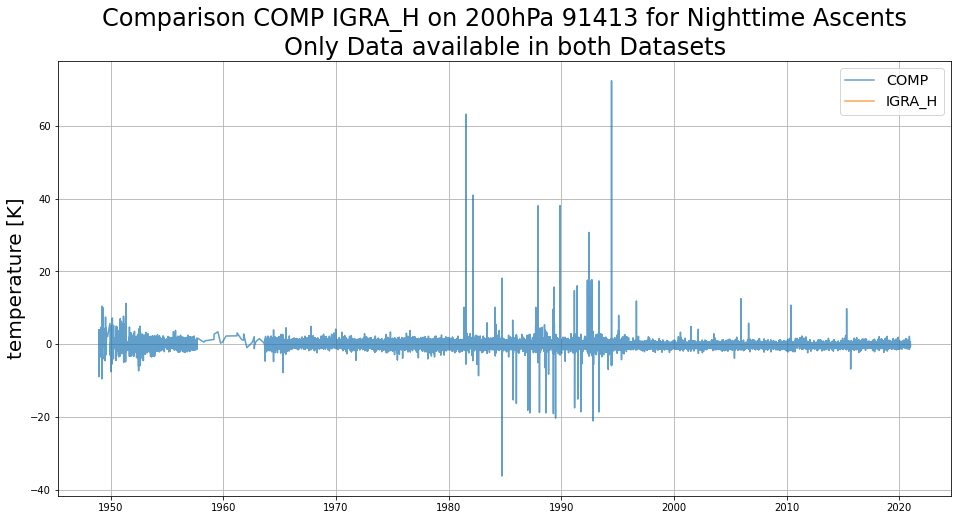

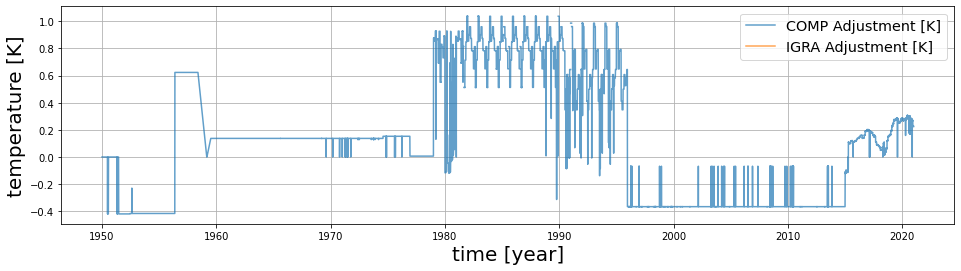

COMP Adjustment MEAN: 0.09744717
COMP Adjustment MIN: -0.4189913
COMP Adjustment MAX: 1.0363239
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


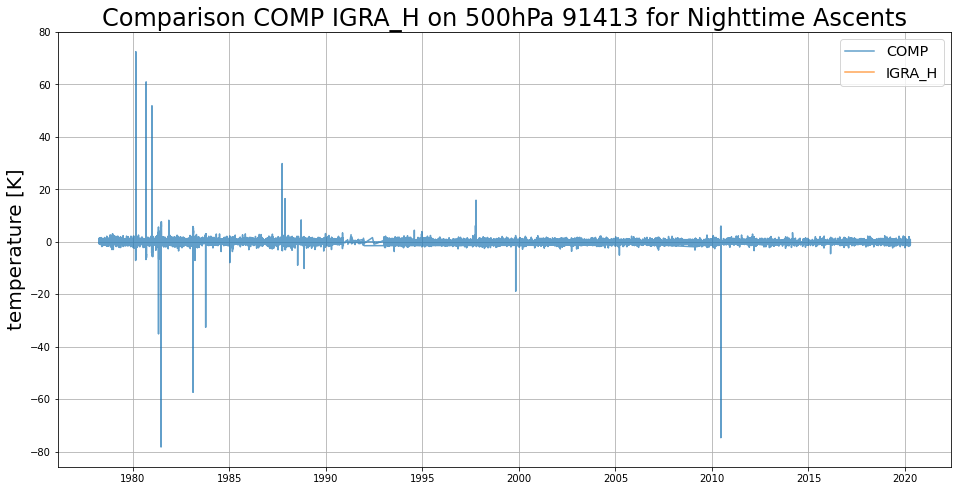

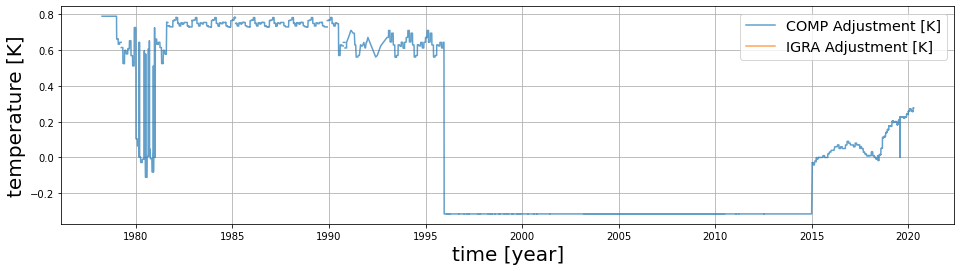

COMP Adjustment MEAN: 0.12414174
COMP Adjustment MIN: -0.31563047
COMP Adjustment MAX: 0.7896059
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


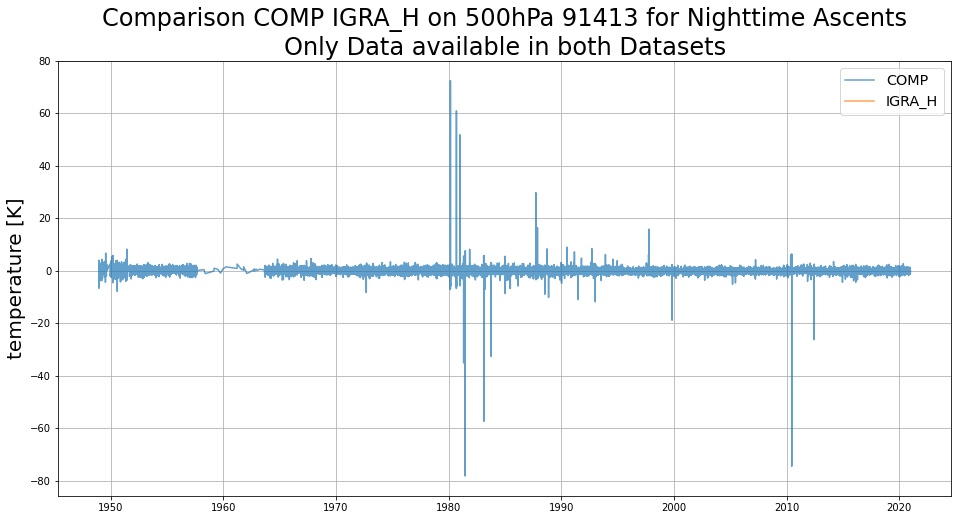

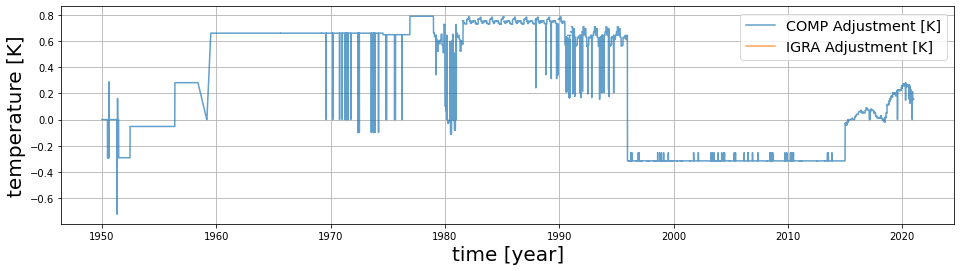

COMP Adjustment MEAN: 0.24594866
COMP Adjustment MIN: -0.7207726
COMP Adjustment MAX: 0.7896059
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


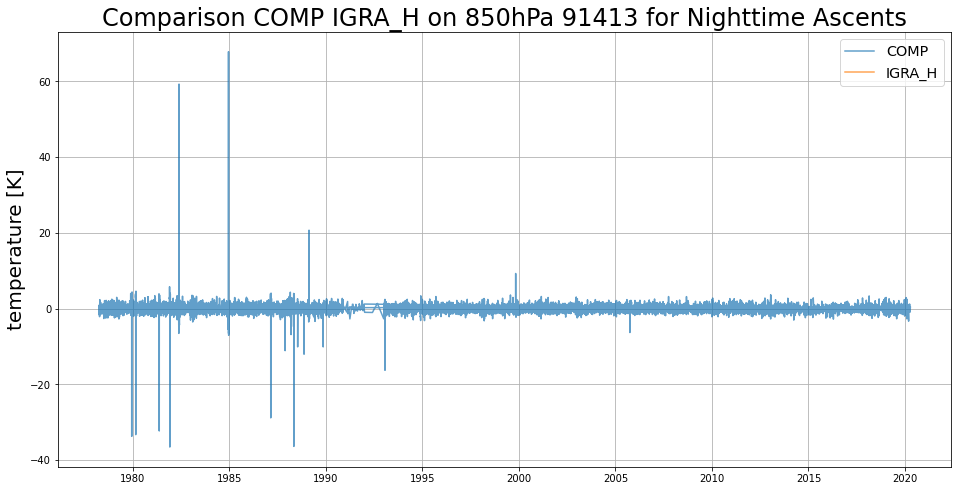

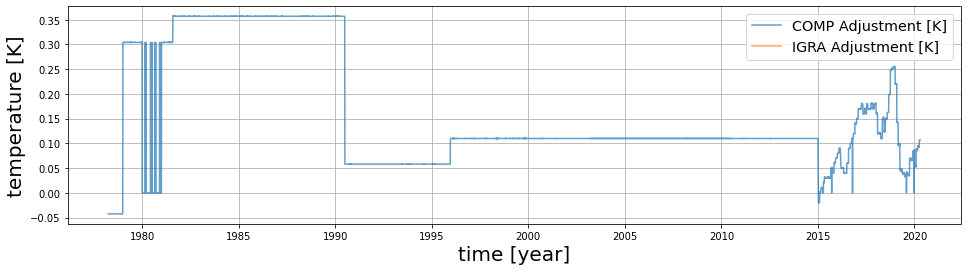

COMP Adjustment MEAN: 0.16412543
COMP Adjustment MIN: -0.04264197
COMP Adjustment MAX: 0.35707712
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


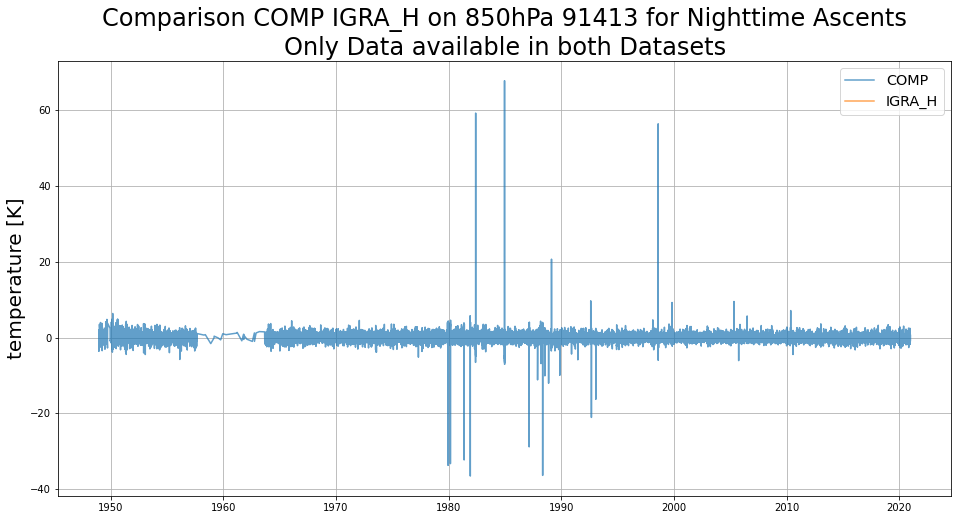

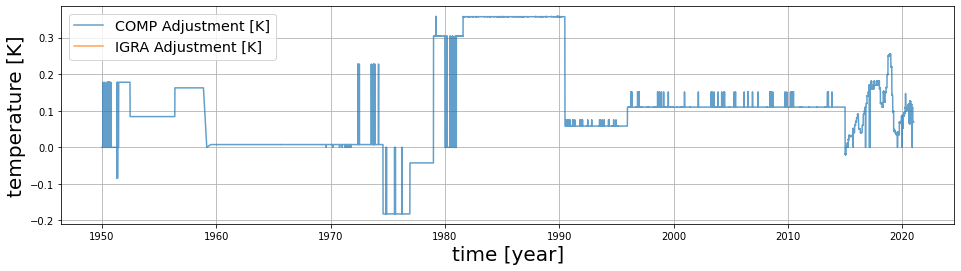

COMP Adjustment MEAN: 0.10538694
COMP Adjustment MIN: -0.1821254
COMP Adjustment MAX: 0.35835123
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


In [24]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour < 6].append(a[a.report_timestamp.dt.hour >= 18])
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour < 6].append(b[b.report_timestamp.dt.hour >= 18])
    c = comp_ma[i]
    c = c[c.time.dt.hour < 6].append(c[c.time.dt.hour >=18])
    xax = np.asarray(c.time)    
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(xax, ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(xax, ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
#     textstr = ('COMP Adjustment MEAN: ' + str(ca.mean()) + '\n' +'COMP Adjustment MIN: ' + str(ca.min()) + '\n' +'COMP Adjustment MAX: ' + str(ca.max()) + '\n' +'IGRA Adjustment MEAN: ' + str(ia.mean())+ '\n' +'IGRA Adjustment MIN: ' + str(ia.min())  + '\n' +'IGRA Adjustment MAX: ' + str(ia.max()))
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(np.nanmean(ca)))
    print('COMP Adjustment MIN: ' + str(np.nanmin(ca)))
    print('COMP Adjustment MAX: ' + str(np.nanmax(ca)))
    print('IGRA Adjustment MEAN: ' + str(np.nanmean(ia)))
    print('IGRA Adjustment MIN: ' + str(np.nanmin(ia)))
    print('IGRA Adjustment MAX: ' + str(np.nanmax(ia)))
    
    
    a = igra_o_ma[i]
    a = a[a.report_timestamp.dt.hour < 6].append(a[a.report_timestamp.dt.hour >= 18]).sort_values('report_timestamp')
    b = igrah_o_ma[i]
    b = b[b.report_timestamp.dt.hour < 6].append(b[b.report_timestamp.dt.hour >= 18]).sort_values('report_timestamp')
    c = comp_o_ma[i]
    c = c[c.time.dt.hour < 6].append(c[c.time.dt.hour >= 18]).sort_values('time')
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(np.asarray(c.time), np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(np.asarray(b.report_timestamp), np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents'+'\n'+'Only Data available in both Datasets')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(np.asarray(c.time), ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(np.asarray(a.report_timestamp), ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
#     textstr = ('COMP Adjustment MEAN: ' + str(ca.mean()) + '\n' +'COMP Adjustment MIN: ' + str(ca.min()) + '\n' +'COMP Adjustment MAX: ' + str(ca.max()) + '\n' +'IGRA Adjustment MEAN: ' + str(ia.mean())+ '\n' +'IGRA Adjustment MIN: ' + str(ia.min())  + '\n' +'IGRA Adjustment MAX: ' + str(ia.max()))
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(np.nanmean(ca)))
    print('COMP Adjustment MIN: ' + str(np.nanmin(ca)))
    print('COMP Adjustment MAX: ' + str(np.nanmax(ca)))
    print('IGRA Adjustment MEAN: ' + str(np.nanmean(ia)))
    print('IGRA Adjustment MIN: ' + str(np.nanmin(ia)))
    print('IGRA Adjustment MAX: ' + str(np.nanmax(ia)))

## Difference:

Finding the difference between the two data sets by subtracting them.

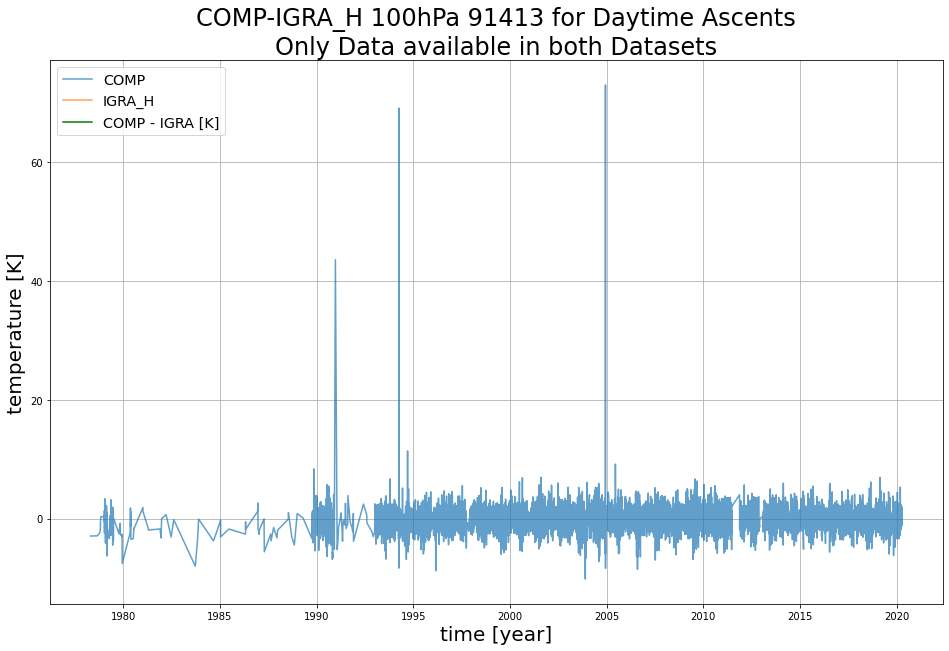

DIFF MEAN: nan
DIFF MIN: nan
DIFF MAX: nan


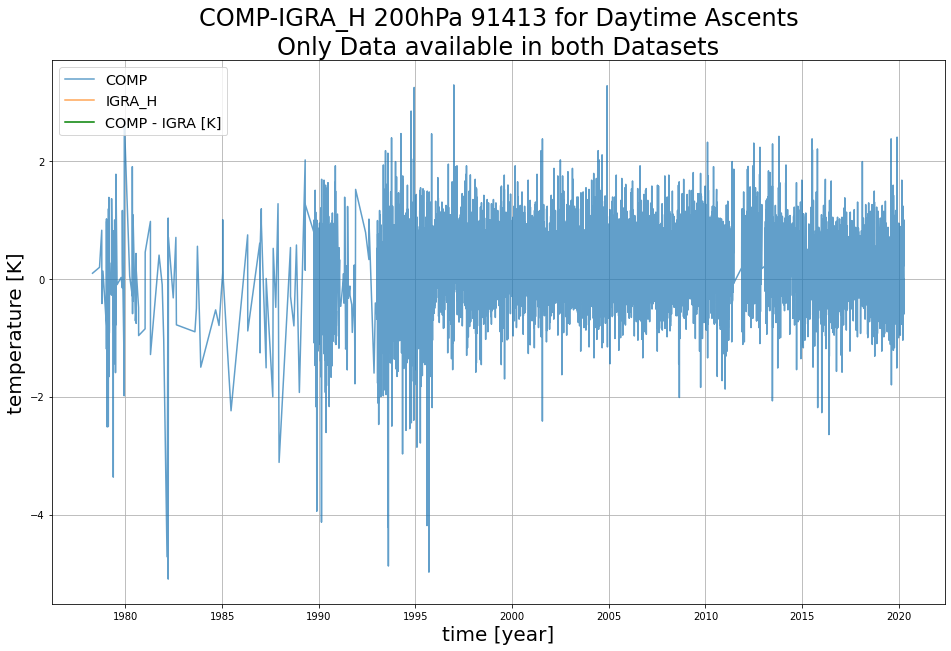

DIFF MEAN: nan
DIFF MIN: nan
DIFF MAX: nan


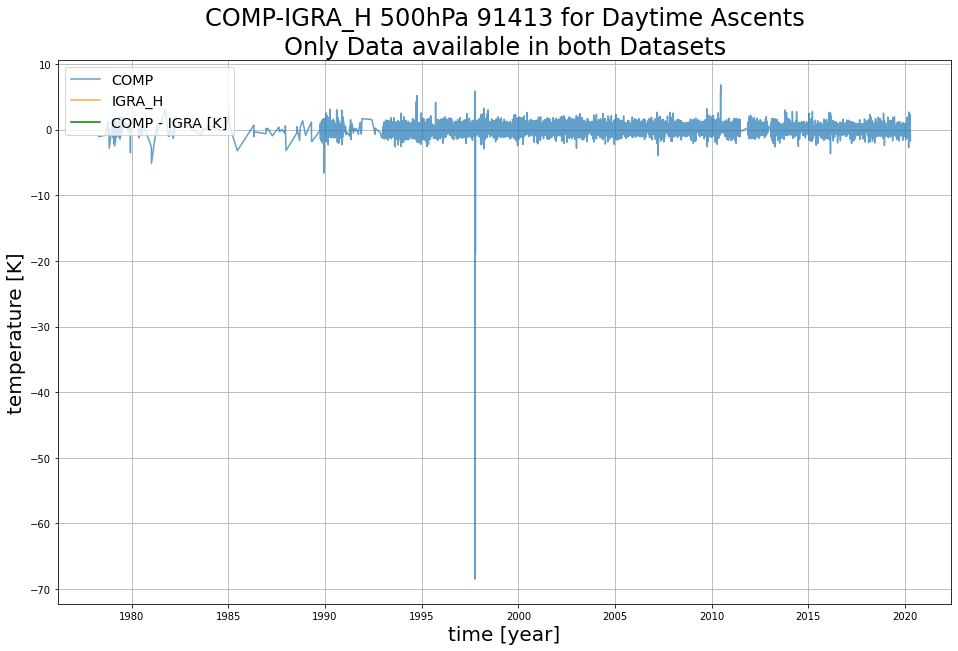

DIFF MEAN: nan
DIFF MIN: nan
DIFF MAX: nan


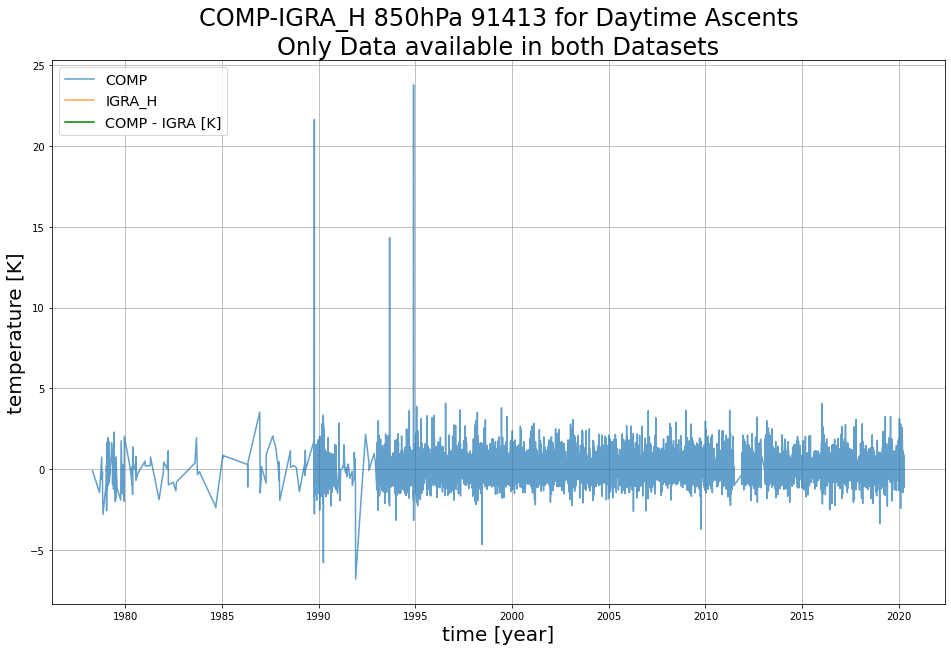

DIFF MEAN: nan
DIFF MIN: nan
DIFF MAX: nan


In [25]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 12]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 12]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 12]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    diff = np.asarray(c.ta)-np.asarray(b.air_temperature)
    ax1.plot(xax, diff, label = 'COMP - IGRA [K]', c='green')
    ax1.grid()
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]', title='COMP-IGRA_H '+str(preslist[i])+'hPa '+loc+' for Daytime Ascents'+'\n'+'Only Data available in both Datasets')
    ax1.legend( loc='upper left')
    plt.show()
    plt.close(fig)
    print('DIFF MEAN: ' + str(diff.mean()))
    print('DIFF MIN: ' + str(diff.min()))
    print('DIFF MAX: ' + str(diff.max()))

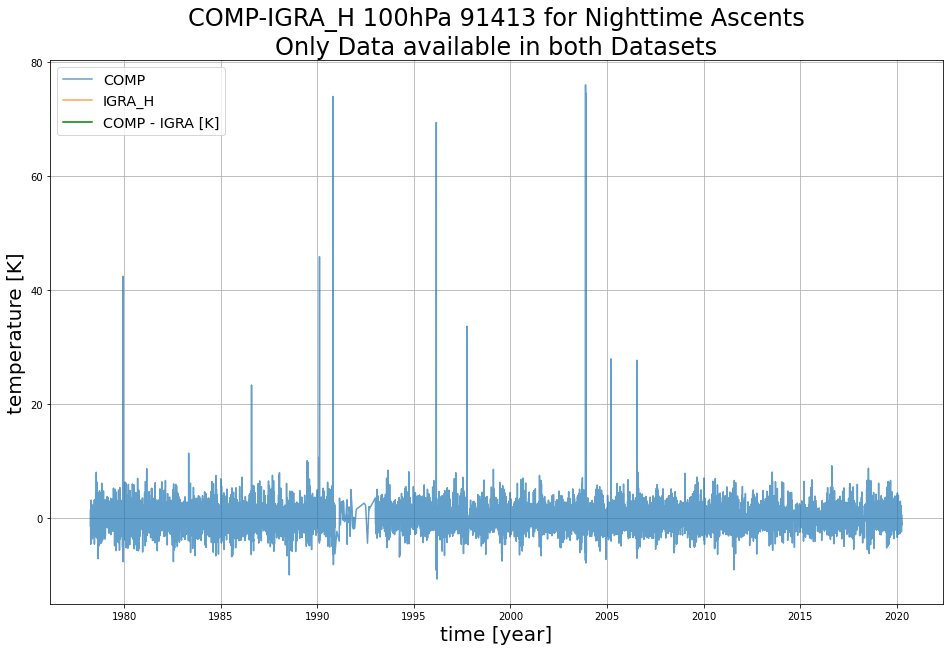

DIFF MEAN: nan
DIFF MIN: nan
DIFF MAX: nan


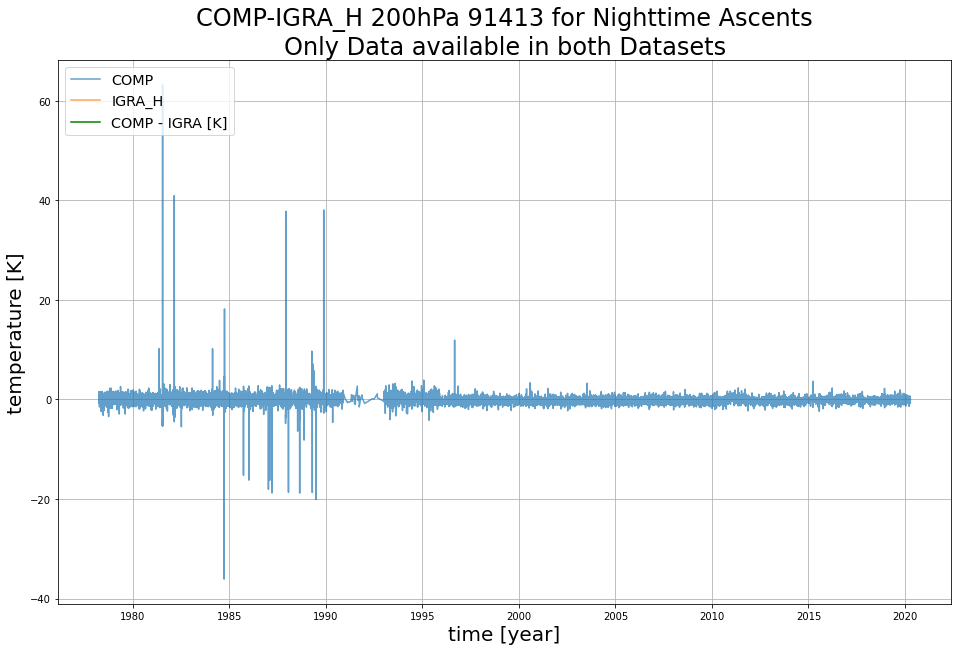

DIFF MEAN: nan
DIFF MIN: nan
DIFF MAX: nan


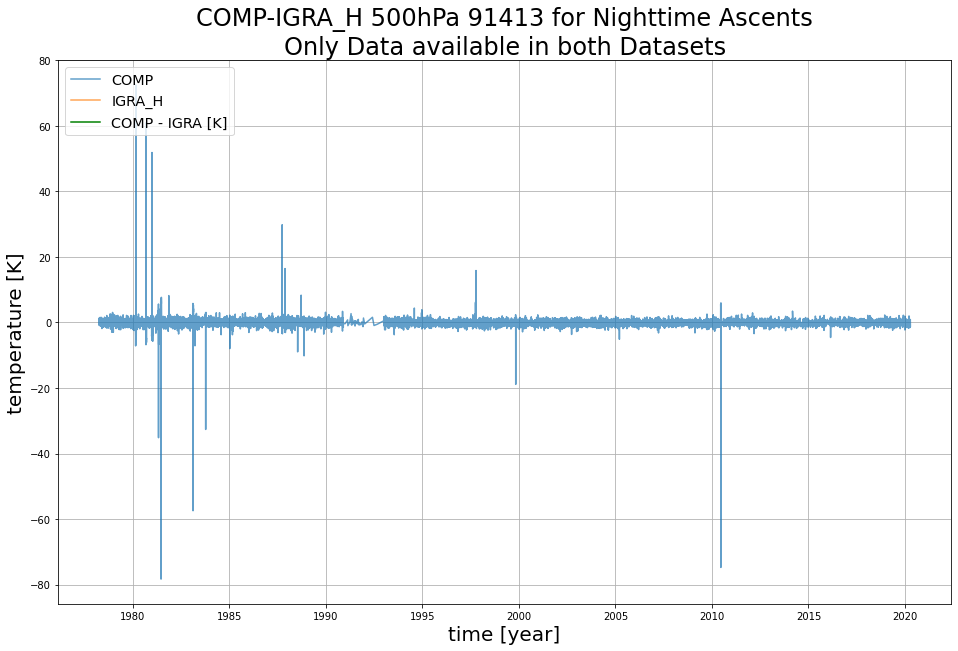

DIFF MEAN: nan
DIFF MIN: nan
DIFF MAX: nan


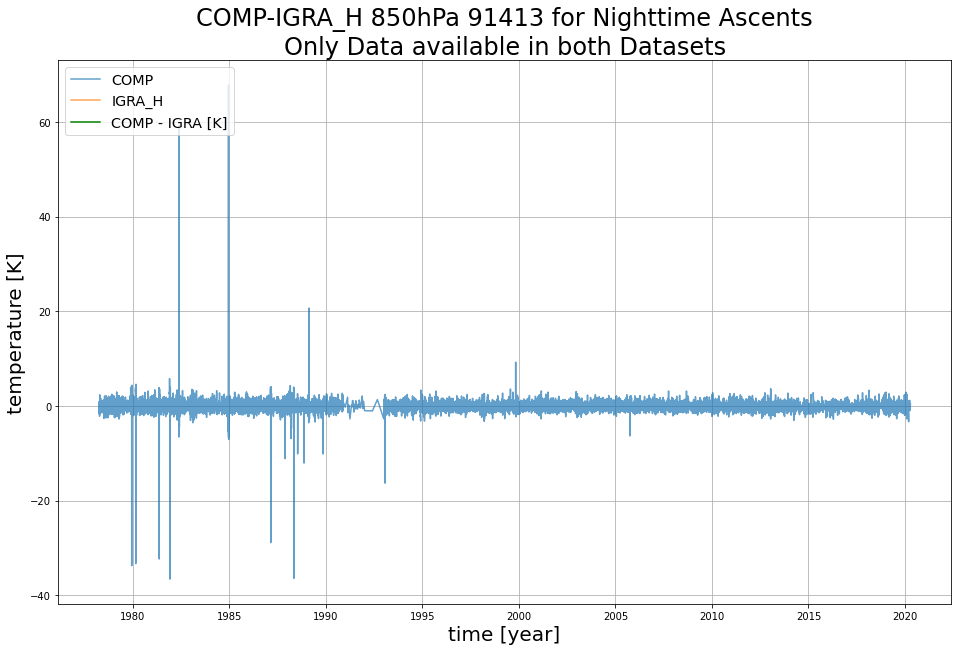

DIFF MEAN: nan
DIFF MIN: nan
DIFF MAX: nan


In [26]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 0]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 0]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 0]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    diff = np.asarray(c.ta)-np.asarray(b.air_temperature)
    ax1.plot(xax, diff, label = 'COMP - IGRA [K]', c='green')
    ax1.grid()
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]', title='COMP-IGRA_H '+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents'+'\n'+'Only Data available in both Datasets')
    ax1.legend( loc='upper left')
    plt.show()
    plt.close(fig)
    print('DIFF MEAN: ' + str(diff.mean()))
    print('DIFF MIN: ' + str(diff.min()))
    print('DIFF MAX: ' + str(diff.max()))

## Distribution of Adjustments

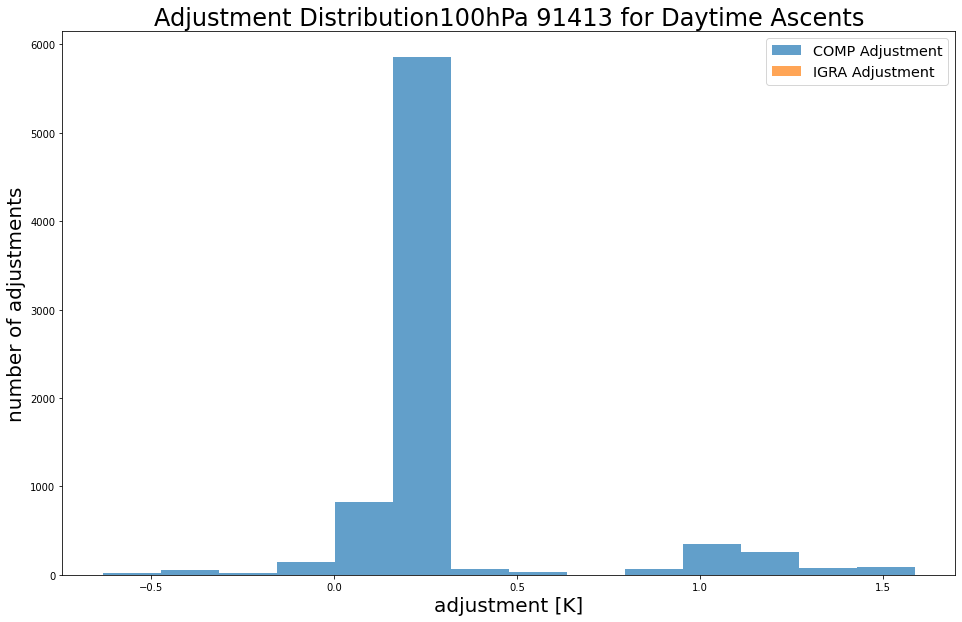

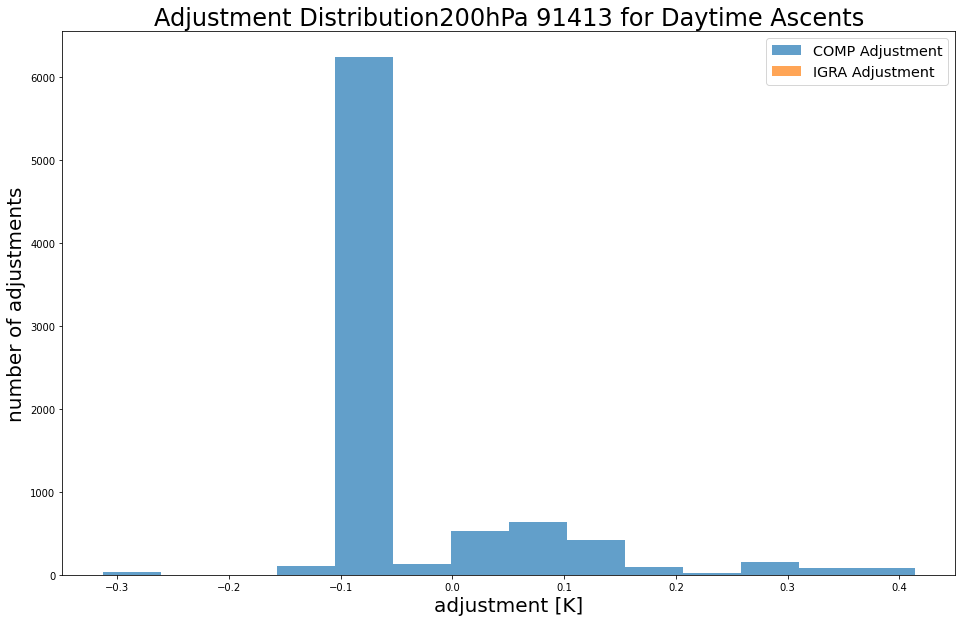

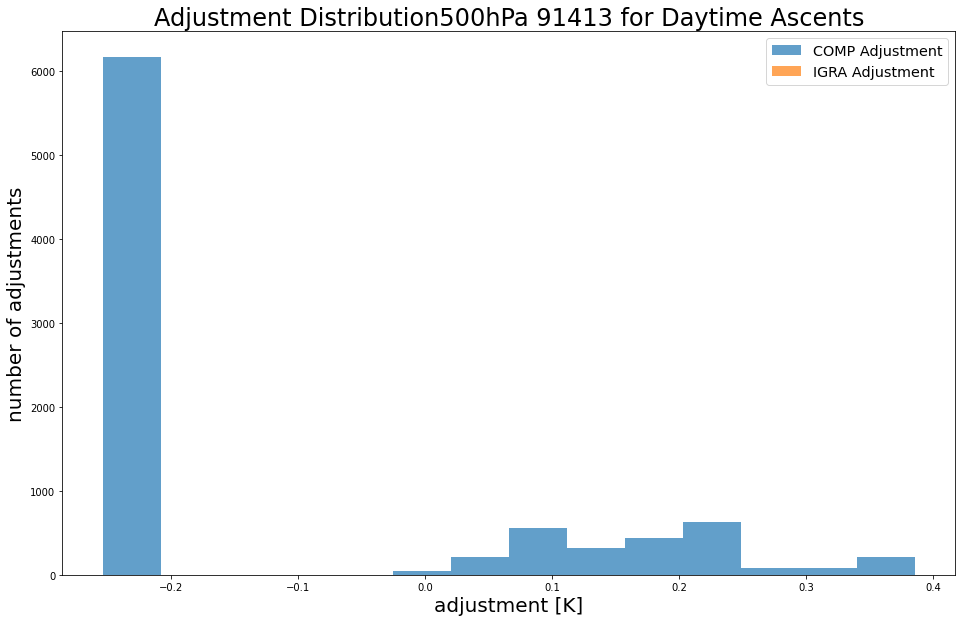

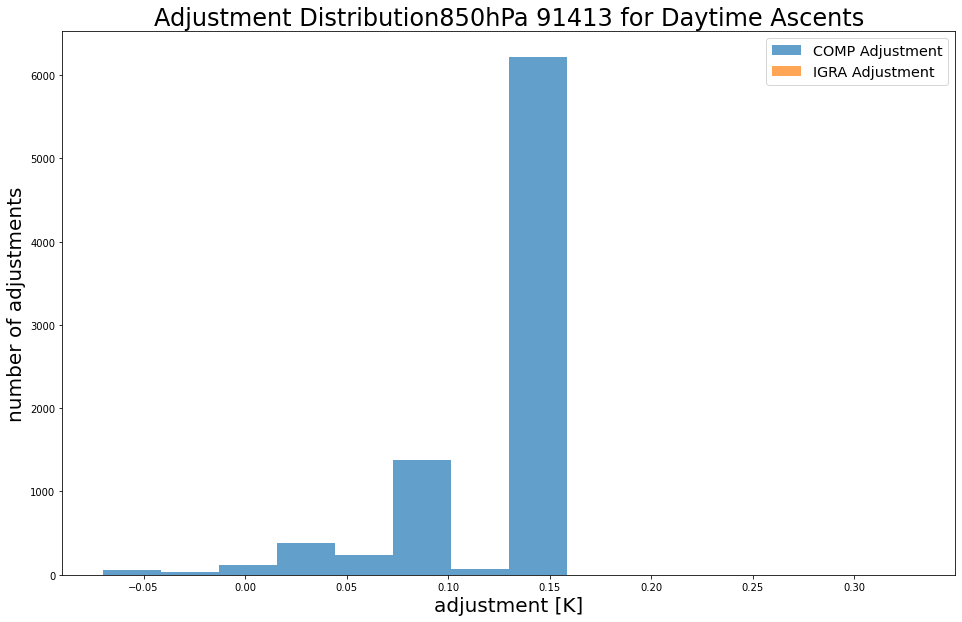

In [27]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 12]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 12]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 12]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ca = np.asarray(c.bias_estimate)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    if np.nanmin(ia) < np.nanmin(ca): binmin = np.nanmin(ia)
    else: binmin = np.nanmin(ca)
    if np.nanmax(ia) > np.nanmax(ca): binmax = np.nanmax(ia)
    else: binmax = np.nanmax(ca)
    bins = np.arange(binmin, binmax, (binmax-binmin)/15.)
    
    ax1.hist(ca, bins=bins, label='COMP Adjustment', alpha=0.7)
    ax1.hist(ia, bins=bins, label='IGRA Adjustment', alpha=0.7)
    
    ax1.set(xlabel ='adjustment [K]', ylabel='number of adjustments', title='Adjustment Distribution'+str(preslist[i])+'hPa '+loc+' for Daytime Ascents')
    ax1.legend( loc='best')
    plt.show()
    plt.close(fig)

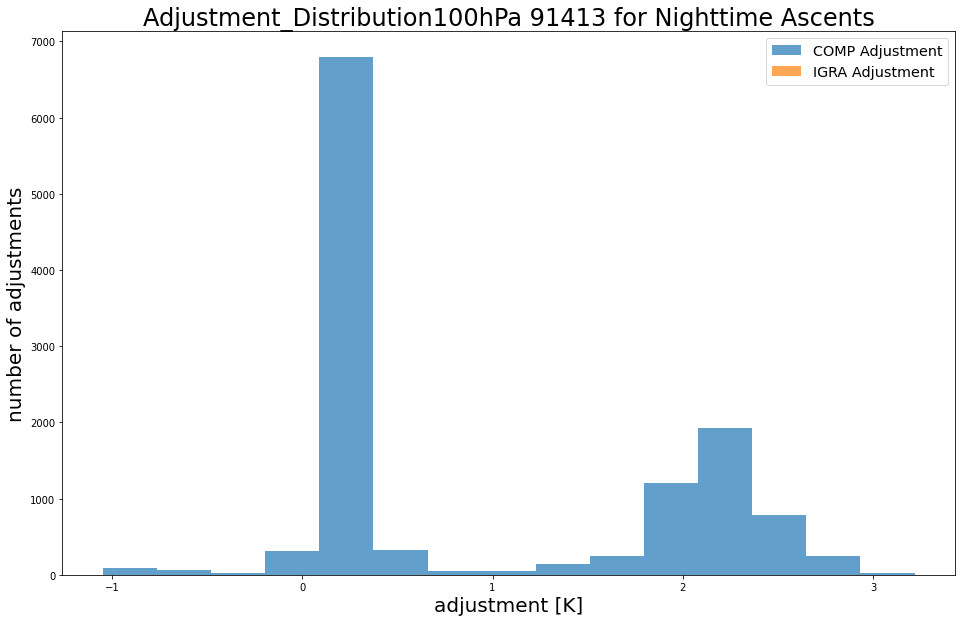

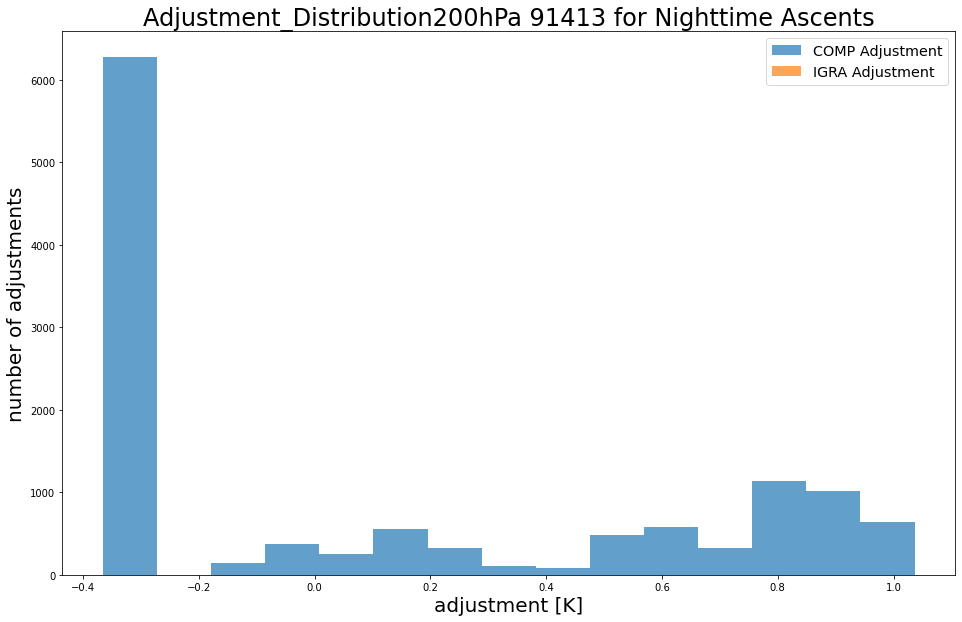

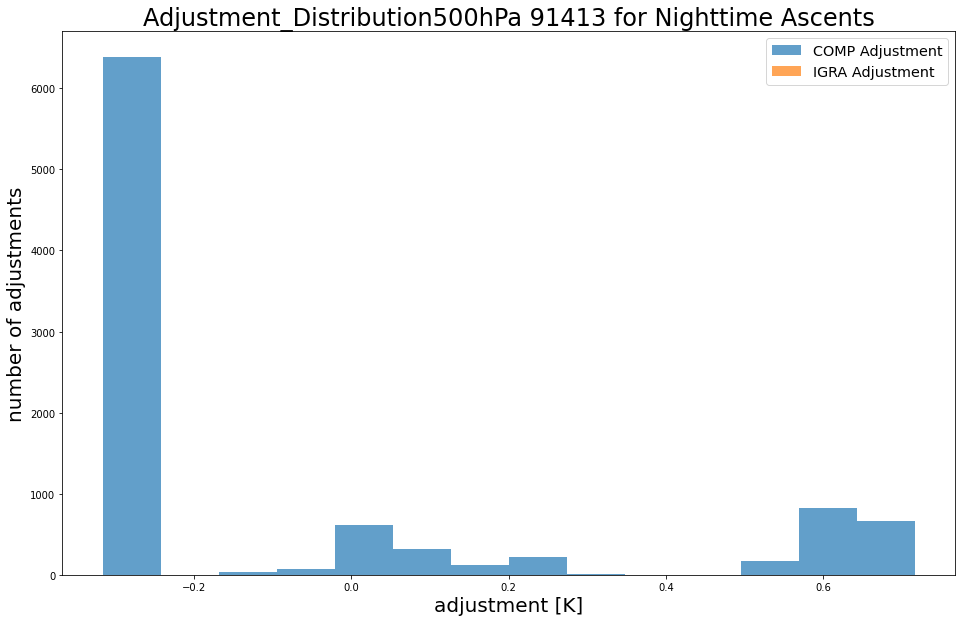

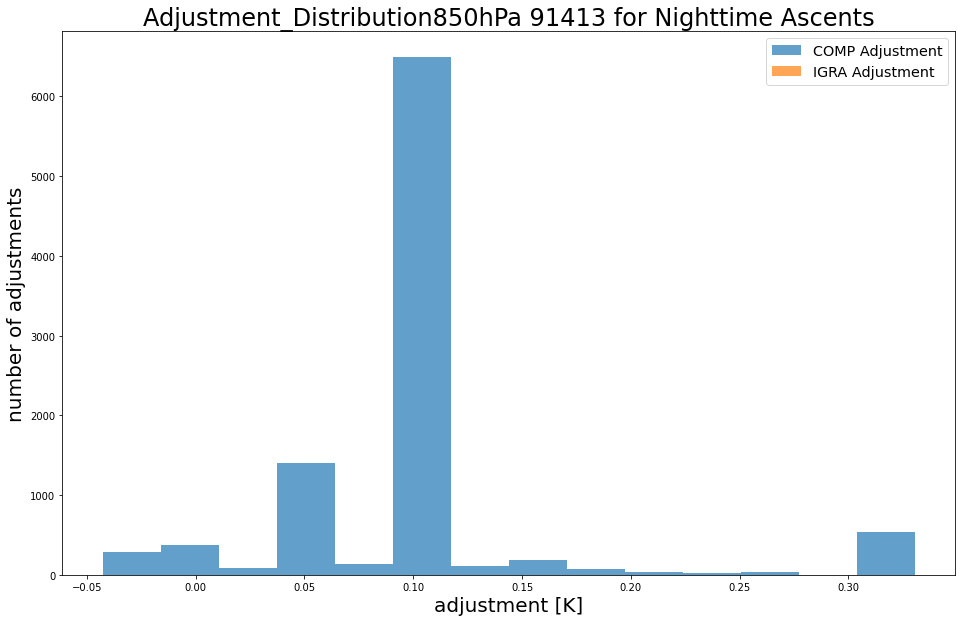

In [28]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 0]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 0]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 0]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ca = np.asarray(c.bias_estimate)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    if np.nanmin(ia) < np.nanmin(ca): binmin = np.nanmin(ia)
    else: binmin = np.nanmin(ca)
    if np.nanmax(ia) > np.nanmax(ca): binmax = np.nanmax(ia)
    else: binmax = np.nanmax(ca)
    bins = np.arange(binmin, binmax, (binmax-binmin)/15.)
    
    ax1.hist(ca, bins=bins, label='COMP Adjustment', alpha=0.7)
    ax1.hist(ia, bins=bins, label='IGRA Adjustment', alpha=0.7)

    ax1.set(xlabel ='adjustment [K]', ylabel='number of adjustments', title='Adjustment_Distribution'+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents')
    ax1.legend( loc='best')
    plt.show()
    plt.close(fig)